### Step 1: Split the data and create the evaluator objects

In [1]:
from Evaluation.Evaluator import EvaluatorHoldout
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

URM_all_dataframe = pd.read_csv(filepath_or_buffer="data_train.csv")
ICM_all = pd.read_csv(filepath_or_buffer="data_ICM_metadata.csv")
URM_all_dataframe.head(n=10)


URM_train_validation, URM_test = train_test_split(URM_all_dataframe, test_size=0.2, random_state=42)
URM_train, URM_validation = train_test_split(URM_train_validation, test_size=0.2, random_state=42)

# # Reset indices for cleaner output (optional)
# URM_test = URM_test.reset_index(drop=True)
# URM_validation = URM_validation.reset_index(drop=True)
# URM_train = URM_train.reset_index(drop=True)
# URM_train_validation = URM_train_validation.reset_index(drop=True)

# Display the results
print("URM_train (80% of URM_ALL):")
print(URM_train.head(n=10))

print("\nURM_validation (20% of URM_ALL):")
print(URM_validation.head(n=10))

print("\nURM_test (20% of URM_ALL):")
print(URM_test.head(n=10))


URM_train (80% of URM_ALL):
         user_id  item_id  data
136935      1523    11379   1.0
286638      3415    29647   1.0
499343      6571    11101   1.0
1612162    31036    17962   1.0
1231767    22131    20291   1.0
1419045    25670    32878   1.0
505970      6677    30720   1.0
1309905    23612    35978   1.0
1026162    17411     9221   1.0
991787     16720     2668   1.0

URM_validation (20% of URM_ALL):
         user_id  item_id  data
1293463    23345    37683   1.0
978469     16471     1559   1.0
1139447    19988     6956   1.0
628101      8833      614   1.0
1276102    23100    20305   1.0
570596      7748      117   1.0
1232901    22148    35968   1.0
1544801    29212    33031   1.0
1033303    17563    34624   1.0
658881      9451     9732   1.0

URM_test (20% of URM_ALL):
         user_id  item_id  data
1092502    18939     8673   1.0
367273      4669     2436   1.0
1181580    20972    25295   1.0
1243868    22394    23927   1.0
302903      3680    24294   1.0
1337700    240

In [2]:
import pandas as pd

# Carica il dataset URM_all_dataframe
URM_all_dataframe = pd.read_csv(filepath_or_buffer="data_train.csv")

# Controlla le colonne del dataset (assumo 'user_id', 'item_id', 'interaction' come colonne principali)
print("Preview del dataset:")
print(URM_all_dataframe.head())

# Numero di utenti e item unici
num_users = URM_all_dataframe['user_id'].nunique()
num_items = URM_all_dataframe['item_id'].nunique()
print(f"\nNumero totale di utenti: {num_users}")
print(f"Numero totale di item: {num_items}")

# Numero totale di interazioni
total_interactions = len(URM_all_dataframe)
print(f"Numero totale di interazioni: {total_interactions}")

# Numero di interazioni per utente
user_interaction_counts = URM_all_dataframe.groupby('user_id').size()

# Utenti senza interazioni
users_with_no_interactions = num_users - len(user_interaction_counts)
print(f"\nNumero di utenti senza interazioni: {users_with_no_interactions}")

# Utenti con il minimo numero di interazioni
min_interactions = user_interaction_counts.min()
users_with_min_interactions = user_interaction_counts[user_interaction_counts == min_interactions].index.tolist()
print(f"\nNumero minimo di interazioni per utente: {min_interactions}")
print(f"Utenti con il numero minimo di interazioni: {users_with_min_interactions[:10]} (mostrati i primi 10)")

# Utenti con il massimo numero di interazioni
max_interactions = user_interaction_counts.max()
users_with_max_interactions = user_interaction_counts[user_interaction_counts == max_interactions].index.tolist()
print(f"\nNumero massimo di interazioni per utente: {max_interactions}")
print(f"Utenti con il numero massimo di interazioni: {users_with_max_interactions[:10]} (mostrati i primi 10)")

# Statistiche delle interazioni utente
mean_interactions = user_interaction_counts.mean()
median_interactions = user_interaction_counts.median()
print(f"\nNumero medio di interazioni per utente: {mean_interactions:.2f}")
print(f"Numero mediano di interazioni per utente: {median_interactions:.2f}")

# Distribuzione delle interazioni utente
interaction_distribution = user_interaction_counts.value_counts().sort_index()
print(f"\nDistribuzione delle interazioni (numero di utenti per numero di interazioni):\n{interaction_distribution}")

# Numero di interazioni per item
item_interaction_counts = URM_all_dataframe.groupby('item_id').size()

# Item con il minimo numero di interazioni
min_item_interactions = item_interaction_counts.min()
items_with_min_interactions = item_interaction_counts[item_interaction_counts == min_item_interactions].index.tolist()
print(f"\nNumero minimo di interazioni per item: {min_item_interactions}")
print(f"Item con il numero minimo di interazioni: {items_with_min_interactions[:10]} (mostrati i primi 10)")

# Item con il massimo numero di interazioni
max_item_interactions = item_interaction_counts.max()
items_with_max_interactions = item_interaction_counts[item_interaction_counts == max_item_interactions].index.tolist()
print(f"\nNumero massimo di interazioni per item: {max_item_interactions}")
print(f"Item con il numero massimo di interazioni: {items_with_max_interactions[:10]} (mostrati i primi 10)")

# Densità della matrice di interazioni
density = total_interactions / (num_users * num_items)
print(f"\nDensità della matrice di interazioni: {density:.6f}")

# Riassunto dei dati
summary = {
    "Numero totale di utenti": num_users,
    "Numero totale di item": num_items,
    "Numero totale di interazioni": total_interactions,
    "Utenti senza interazioni": users_with_no_interactions,
    "Minimo interazioni per utente": min_interactions,
    "Massimo interazioni per utente": max_interactions,
    "Media interazioni per utente": mean_interactions,
    "Mediana interazioni per utente": median_interactions,
    "Densità della matrice": density,
    "Numero minimo di interazioni per item": min_item_interactions,
    "Numero massimo di interazioni per item": max_item_interactions,
}

print("\nRiassunto del dataset:")
for key, value in summary.items():
    print(f"{key}: {value}")


Preview del dataset:
   user_id  item_id  data
0        0        0   1.0
1        0        2   1.0
2        0      120   1.0
3        0      128   1.0
4        0      211   1.0

Numero totale di utenti: 35736
Numero totale di item: 38121
Numero totale di interazioni: 1764607

Numero di utenti senza interazioni: 0

Numero minimo di interazioni per utente: 12
Utenti con il numero minimo di interazioni: [35484] (mostrati i primi 10)

Numero massimo di interazioni per utente: 5895
Utenti con il numero massimo di interazioni: [1680] (mostrati i primi 10)

Numero medio di interazioni per utente: 49.38
Numero mediano di interazioni per utente: 30.00

Distribuzione delle interazioni (numero di utenti per numero di interazioni):
12        1
13        4
14       24
15       99
16      309
       ... 
1113      1
1383      1
2224      1
3040      1
5895      1
Name: count, Length: 486, dtype: int64

Numero minimo di interazioni per item: 12
Item con il numero minimo di interazioni: [8152] (mostra

In [2]:
# Ordina gli utenti in base al numero di interazioni (crescentemente)
sorted_users_by_interactions = user_interaction_counts.sort_values()

# Prendi i primi 15 utenti con il minor numero di interazioni
top_15_users = sorted_users_by_interactions.head(15).index.tolist()

# Filtra le interazioni per questi utenti
filtered_interactions = URM_all_dataframe[URM_all_dataframe['user_id'].isin(top_15_users)]

# Costruisce la tabella in cui ogni riga rappresenta un utente e contiene tutti gli item_id delle sue interazioni
user_item_table = filtered_interactions.groupby('user_id')['item_id'].apply(list).reset_index()

# Converte la lista di item_id in colonne separate
user_item_table_expanded = pd.DataFrame(user_item_table['item_id'].tolist())
user_item_table_expanded.insert(0, 'user_id', user_item_table['user_id'])

# Mostra la tabella
print("\nTabella con 15 utenti con il minor numero di interazioni:")
print(user_item_table_expanded)


NameError: name 'user_interaction_counts' is not defined

In [3]:
URM_all_dataframe = csr_matrix((URM_all_dataframe['data'], (URM_all_dataframe['user_id'], URM_all_dataframe['item_id'])))
URM_train = csr_matrix((URM_train['data'], (URM_train['user_id'], URM_train['item_id'])))
URM_validation = csr_matrix((URM_validation['data'], (URM_validation['user_id'], URM_validation['item_id'])))
URM_test = csr_matrix((URM_test['data'], (URM_test['user_id'], URM_test['item_id'])))
URM_train_validation = csr_matrix((URM_train_validation['data'], (URM_train_validation['user_id'], URM_train_validation['item_id'])))
ICM_all = csr_matrix((ICM_all['data'], (ICM_all['item_id'], ICM_all['feature_id'])))

#evaluator_validation = EvaluatorHoldout(URM_test, cutoff_list=[10])
evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 401 ( 1.1%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 152 ( 0.4%) Users that have less than 1 test interactions


In [11]:
#baseline 0.044381626395310673 implicit=false
#baseline 0.044381626395310673 implicit=true
import optuna
import pandas as pd
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
def objective_function(optuna_trial):
    
    recommender_instance = P3alphaRecommender(URM_train_validation)
    recommender_instance.fit( 
                    topK = optuna_trial.suggest_int("topK", 5, 1000),
                    alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),
                    normalize_similarity = optuna_trial.suggest_categorical("normalize_similarity", [True, False]),
                    implicit=True,
                    )
    
    result_df, _ = evaluator_test.evaluateRecommender(recommender_instance)
    return result_df.loc[10]["MAP"]



### Step 3: Create an object/function that will be called after every call of the objective function to log the results in a dataframe for easier readability

In [12]:
class SaveResults(object):
    def __init__(self, save_path="optuna_progressP3.csv"):
        # File dove salvare i risultati
        self.save_path = save_path

        # Se esiste già un file, carichiamo i dati per continuare
        try:
            self.results_df = pd.read_csv(self.save_path)
        except FileNotFoundError:
            self.results_df = pd.DataFrame(columns=["trial_number", "value", "params"])
    
    def __call__(self, optuna_study, optuna_trial):
        # Salva i risultati del trial corrente
        trial_data = {
            "trial_number": optuna_trial.number,
            "value": optuna_trial.value,
            "params": optuna_trial.params
        }

        # Aggiungi i risultati al DataFrame
        self.results_df = pd.concat([self.results_df, pd.DataFrame([trial_data])], ignore_index=True)

        # Salva i risultati progressivamente su disco
        self.results_df.to_csv(self.save_path, index=False)

        # Salva anche il miglior risultato corrente
        best_trial = optuna_study.best_trial
        best_result = {
            "trial_number": best_trial.number,
            "value": best_trial.value,
            **best_trial.params
        }

        best_results_df = pd.DataFrame([best_result])
        best_results_df.to_csv("best_optuna_resultsP3.csv", index=False)
        
        print(f"Results saved to {self.save_path} and best results to 'best_optuna_results.csv'")


In [14]:
# Creazione dello studio Optuna
optuna_study = optuna.create_study(direction="maximize")

# Inizializzazione del callback per salvare progressivamente i risultati
save_results = SaveResults(save_path="optuna_progressP3.csv")

# Esecuzione dell'ottimizzazione
optuna_study.optimize(
    objective_function,
    callbacks=[save_results],
    n_trials=1000
)

[I 2024-11-28 23:15:18,202] A new study created in memory with name: no-name-0980d77d-9024-4372-a91f-95a62b1554b3
/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1448.97 column/sec. Elapsed time 26.31 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 21.91 sec. Users per second: 1624


[I 2024-11-28 23:16:21,264] Trial 0 finished with value: 0.03681340418736322 and parameters: {'topK': 761, 'alpha': 0.9994357329180794, 'normalize_similarity': True}. Best is trial 0 with value: 0.03681340418736322.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3934.00 column/sec. Elapsed time 9.69 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.33 sec. Users per second: 3140


[I 2024-11-28 23:16:43,111] Trial 1 finished with value: 0.051583664987650706 and parameters: {'topK': 38, 'alpha': 0.515912483543026, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1266.86 column/sec. Elapsed time 30.09 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 22.47 sec. Users per second: 1584


[I 2024-11-28 23:17:53,823] Trial 2 finished with value: 0.03487726782859304 and parameters: {'topK': 916, 'alpha': 0.5015343317600793, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2289.05 column/sec. Elapsed time 16.65 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 16.29 sec. Users per second: 2184


[I 2024-11-28 23:18:32,439] Trial 3 finished with value: 0.030108244877311754 and parameters: {'topK': 319, 'alpha': 0.11273170640874987, 'normalize_similarity': False}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1249.97 column/sec. Elapsed time 30.50 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 22.56 sec. Users per second: 1577


[I 2024-11-28 23:19:41,914] Trial 4 finished with value: 0.03471701098942139 and parameters: {'topK': 841, 'alpha': 0.3425498562801091, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3174.37 column/sec. Elapsed time 12.01 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.87 sec. Users per second: 2565


[I 2024-11-28 23:20:09,499] Trial 5 finished with value: 0.04774825675173957 and parameters: {'topK': 88, 'alpha': 0.49246082671443375, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3250.58 column/sec. Elapsed time 11.73 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.69 sec. Users per second: 2805


[I 2024-11-28 23:20:35,466] Trial 6 finished with value: 0.04263536826788378 and parameters: {'topK': 79, 'alpha': 0.628112680182035, 'normalize_similarity': False}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1276.33 column/sec. Elapsed time 29.87 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.81 sec. Users per second: 1710


[I 2024-11-28 23:21:40,889] Trial 7 finished with value: 0.034325957760576 and parameters: {'topK': 748, 'alpha': 0.14034135405317977, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4326.57 column/sec. Elapsed time 8.81 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.41 sec. Users per second: 3418


[I 2024-11-28 23:22:00,464] Trial 8 finished with value: 0.047503269705662314 and parameters: {'topK': 5, 'alpha': 0.9973147561304996, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1269.42 column/sec. Elapsed time 30.03 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 23.45 sec. Users per second: 1518


[I 2024-11-28 23:23:11,637] Trial 9 finished with value: 0.03625847982328301 and parameters: {'topK': 889, 'alpha': 0.9747700861791226, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2037.02 column/sec. Elapsed time 18.71 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 18.04 sec. Users per second: 1973


[I 2024-11-28 23:23:56,354] Trial 10 finished with value: 0.03780916561393609 and parameters: {'topK': 408, 'alpha': 0.6875913739235026, 'normalize_similarity': False}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2464.72 column/sec. Elapsed time 15.47 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 15.41 sec. Users per second: 2309


[I 2024-11-28 23:24:31,088] Trial 11 finished with value: 0.042858949447583325 and parameters: {'topK': 205, 'alpha': 0.442439713673221, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1549.89 column/sec. Elapsed time 24.60 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.44 sec. Users per second: 1741


[I 2024-11-28 23:25:28,020] Trial 12 finished with value: 0.03767093133528771 and parameters: {'topK': 569, 'alpha': 0.7369362807351901, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2765.51 column/sec. Elapsed time 13.78 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 14.31 sec. Users per second: 2487


[I 2024-11-28 23:25:59,544] Trial 13 finished with value: 0.043448661829463366 and parameters: {'topK': 182, 'alpha': 0.3292026315277476, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2748.61 column/sec. Elapsed time 13.87 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 14.53 sec. Users per second: 2449


[I 2024-11-28 23:26:31,607] Trial 14 finished with value: 0.04239359405332706 and parameters: {'topK': 182, 'alpha': 0.80954482994547, 'normalize_similarity': False}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1617.80 column/sec. Elapsed time 23.56 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.49 sec. Users per second: 1826


[I 2024-11-28 23:27:25,751] Trial 15 finished with value: 0.03706686436564895 and parameters: {'topK': 543, 'alpha': 0.3569778077665753, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2092.84 column/sec. Elapsed time 18.21 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 16.91 sec. Users per second: 2105


[I 2024-11-28 23:28:07,816] Trial 16 finished with value: 0.03993032694380059 and parameters: {'topK': 342, 'alpha': 0.5621793905924642, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3578.16 column/sec. Elapsed time 10.65 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.19 sec. Users per second: 2920


[I 2024-11-28 23:28:31,788] Trial 17 finished with value: 0.049789877919091466 and parameters: {'topK': 55, 'alpha': 0.21943299546279804, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3979.59 column/sec. Elapsed time 9.58 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.23 sec. Users per second: 3170


[I 2024-11-28 23:28:53,026] Trial 18 finished with value: 0.03860375315818631 and parameters: {'topK': 10, 'alpha': 0.21519672501939519, 'normalize_similarity': False}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2371.76 column/sec. Elapsed time 16.07 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 15.54 sec. Users per second: 2289


[I 2024-11-28 23:29:29,672] Trial 19 finished with value: 0.04087304486767593 and parameters: {'topK': 270, 'alpha': 0.2515997404101562, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1896.52 column/sec. Elapsed time 20.10 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 17.84 sec. Users per second: 1995


[I 2024-11-28 23:30:16,276] Trial 20 finished with value: 0.03841369649815722 and parameters: {'topK': 435, 'alpha': 0.41041387516762, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3185.25 column/sec. Elapsed time 11.97 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.10 sec. Users per second: 2716


[I 2024-11-28 23:30:43,464] Trial 21 finished with value: 0.04682686328615486 and parameters: {'topK': 106, 'alpha': 0.52399815052092, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3276.89 column/sec. Elapsed time 11.63 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.08 sec. Users per second: 2721


[I 2024-11-28 23:31:10,096] Trial 22 finished with value: 0.047405606764586536 and parameters: {'topK': 95, 'alpha': 0.6069271579159076, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3046.13 column/sec. Elapsed time 12.51 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.34 sec. Users per second: 2667


[I 2024-11-28 23:31:38,274] Trial 23 finished with value: 0.045460956011974286 and parameters: {'topK': 126, 'alpha': 0.2318610601811144, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2482.90 column/sec. Elapsed time 15.35 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 15.17 sec. Users per second: 2346


[I 2024-11-28 23:32:13,452] Trial 24 finished with value: 0.041828498138987306 and parameters: {'topK': 244, 'alpha': 0.4838137209401103, 'normalize_similarity': True}. Best is trial 1 with value: 0.051583664987650706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4167.08 column/sec. Elapsed time 9.15 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.76 sec. Users per second: 3307


[I 2024-11-28 23:32:33,772] Trial 25 finished with value: 0.05185599846015851 and parameters: {'topK': 9, 'alpha': 0.83997868142532, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3971.83 column/sec. Elapsed time 9.60 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.20 sec. Users per second: 3178


[I 2024-11-28 23:32:55,427] Trial 26 finished with value: 0.047375366447911335 and parameters: {'topK': 37, 'alpha': 0.8807345626408817, 'normalize_similarity': False}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3182.46 column/sec. Elapsed time 11.98 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.12 sec. Users per second: 2711


[I 2024-11-28 23:33:23,104] Trial 27 finished with value: 0.04483961156967094 and parameters: {'topK': 132, 'alpha': 0.8741105998969564, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2392.30 column/sec. Elapsed time 15.93 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 15.59 sec. Users per second: 2282


[I 2024-11-28 23:34:00,228] Trial 28 finished with value: 0.040737828264173 and parameters: {'topK': 293, 'alpha': 0.7266089308652676, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1557.44 column/sec. Elapsed time 24.48 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.40 sec. Users per second: 1745


[I 2024-11-28 23:34:58,016] Trial 29 finished with value: 0.03672631426108982 and parameters: {'topK': 670, 'alpha': 0.6433192011959961, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2139.08 column/sec. Elapsed time 17.82 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 17.02 sec. Users per second: 2090


[I 2024-11-28 23:35:40,110] Trial 30 finished with value: 0.039519666632763996 and parameters: {'topK': 377, 'alpha': 0.801357432885521, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3704.57 column/sec. Elapsed time 10.29 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.75 sec. Users per second: 3028


[I 2024-11-28 23:36:03,378] Trial 31 finished with value: 0.04967440891036978 and parameters: {'topK': 60, 'alpha': 0.5624739964164782, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3877.81 column/sec. Elapsed time 9.83 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.37 sec. Users per second: 3131


[I 2024-11-28 23:36:25,511] Trial 32 finished with value: 0.05088653184594996 and parameters: {'topK': 44, 'alpha': 0.5709051883116166, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2971.83 column/sec. Elapsed time 12.83 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.21 sec. Users per second: 2694


[I 2024-11-28 23:36:54,392] Trial 33 finished with value: 0.04413682335381502 and parameters: {'topK': 162, 'alpha': 0.29356943968453, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1199.97 column/sec. Elapsed time 31.77 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 22.39 sec. Users per second: 1590


[I 2024-11-28 23:38:07,405] Trial 34 finished with value: 0.033097177392013795 and parameters: {'topK': 999, 'alpha': 0.16113909139257887, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2728.27 column/sec. Elapsed time 13.97 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 14.39 sec. Users per second: 2473


[I 2024-11-28 23:38:40,084] Trial 35 finished with value: 0.041945639916636614 and parameters: {'topK': 237, 'alpha': 0.3838588386030308, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4268.34 column/sec. Elapsed time 8.93 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.60 sec. Users per second: 3357


[I 2024-11-28 23:38:59,981] Trial 36 finished with value: 0.04910115322920046 and parameters: {'topK': 5, 'alpha': 0.9302718670176411, 'normalize_similarity': False}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3747.98 column/sec. Elapsed time 10.17 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.72 sec. Users per second: 3037


[I 2024-11-28 23:39:23,055] Trial 37 finished with value: 0.04924961816261099 and parameters: {'topK': 56, 'alpha': 0.7917672556500941, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3202.53 column/sec. Elapsed time 11.90 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.82 sec. Users per second: 2775


[I 2024-11-28 23:39:50,216] Trial 38 finished with value: 0.04547395454172206 and parameters: {'topK': 134, 'alpha': 0.4788988031009468, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3610.97 column/sec. Elapsed time 10.56 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.99 sec. Users per second: 2968


[I 2024-11-28 23:40:14,214] Trial 39 finished with value: 0.04862526831213425 and parameters: {'topK': 74, 'alpha': 0.6068758452194087, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2758.20 column/sec. Elapsed time 13.82 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 14.39 sec. Users per second: 2474


[I 2024-11-28 23:40:46,169] Trial 40 finished with value: 0.036556475801500225 and parameters: {'topK': 209, 'alpha': 0.4380114014901668, 'normalize_similarity': False}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3791.75 column/sec. Elapsed time 10.05 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.59 sec. Users per second: 3071


[I 2024-11-28 23:41:08,935] Trial 41 finished with value: 0.049646194874456 and parameters: {'topK': 54, 'alpha': 0.6967577620583358, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3605.05 column/sec. Elapsed time 10.57 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.99 sec. Users per second: 2967


[I 2024-11-28 23:41:32,875] Trial 42 finished with value: 0.04881587921626797 and parameters: {'topK': 71, 'alpha': 0.560359404661803, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3061.97 column/sec. Elapsed time 12.45 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.38 sec. Users per second: 2660


[I 2024-11-28 23:42:01,578] Trial 43 finished with value: 0.044736107319499764 and parameters: {'topK': 150, 'alpha': 0.6508387683655006, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4245.22 column/sec. Elapsed time 8.98 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.65 sec. Users per second: 3340


[I 2024-11-28 23:42:21,578] Trial 44 finished with value: 0.05108250007136963 and parameters: {'topK': 6, 'alpha': 0.5817131128662602, 'normalize_similarity': True}. Best is trial 25 with value: 0.05185599846015851.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4011.91 column/sec. Elapsed time 9.50 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.04 sec. Users per second: 3222


[I 2024-11-28 23:42:42,747] Trial 45 finished with value: 0.05228024277006766 and parameters: {'topK': 26, 'alpha': 0.15931727406838098, 'normalize_similarity': True}. Best is trial 45 with value: 0.05228024277006766.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4206.91 column/sec. Elapsed time 9.06 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.75 sec. Users per second: 3311


[I 2024-11-28 23:43:02,988] Trial 46 finished with value: 0.05272170990885673 and parameters: {'topK': 10, 'alpha': 0.759743705304917, 'normalize_similarity': True}. Best is trial 46 with value: 0.05272170990885673.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4132.53 column/sec. Elapsed time 9.22 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.84 sec. Users per second: 3283


[I 2024-11-28 23:43:23,567] Trial 47 finished with value: 0.052770953995730084 and parameters: {'topK': 16, 'alpha': 0.83218258366692, 'normalize_similarity': True}. Best is trial 47 with value: 0.052770953995730084.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3319.50 column/sec. Elapsed time 11.48 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.71 sec. Users per second: 2799


[I 2024-11-28 23:43:49,824] Trial 48 finished with value: 0.046090588466724855 and parameters: {'topK': 107, 'alpha': 0.8405089498327297, 'normalize_similarity': True}. Best is trial 47 with value: 0.052770953995730084.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1536.82 column/sec. Elapsed time 24.81 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.93 sec. Users per second: 1786


[I 2024-11-28 23:44:47,008] Trial 49 finished with value: 0.03876446276014771 and parameters: {'topK': 638, 'alpha': 0.9400166074519962, 'normalize_similarity': False}. Best is trial 47 with value: 0.052770953995730084.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2903.29 column/sec. Elapsed time 13.13 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.74 sec. Users per second: 2590


[I 2024-11-28 23:45:17,497] Trial 50 finished with value: 0.04309476191368194 and parameters: {'topK': 192, 'alpha': 0.7457930328146386, 'normalize_similarity': True}. Best is trial 47 with value: 0.052770953995730084.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4303.86 column/sec. Elapsed time 8.86 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.58 sec. Users per second: 3365


[I 2024-11-28 23:45:37,477] Trial 51 finished with value: 0.05303183792251706 and parameters: {'topK': 18, 'alpha': 0.7659313361267492, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4340.15 column/sec. Elapsed time 8.78 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.37 sec. Users per second: 3432


[I 2024-11-28 23:45:57,057] Trial 52 finished with value: 0.05301792160021804 and parameters: {'topK': 11, 'alpha': 0.7604613840776064, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4068.23 column/sec. Elapsed time 9.37 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.88 sec. Users per second: 3272


[I 2024-11-28 23:46:17,899] Trial 53 finished with value: 0.05239992158059089 and parameters: {'topK': 20, 'alpha': 0.8499485831479091, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3417.81 column/sec. Elapsed time 11.15 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.74 sec. Users per second: 2793


[I 2024-11-28 23:46:43,738] Trial 54 finished with value: 0.04660497271825216 and parameters: {'topK': 91, 'alpha': 0.8997113730834299, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3961.14 column/sec. Elapsed time 9.62 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.99 sec. Users per second: 3237


[I 2024-11-28 23:47:05,137] Trial 55 finished with value: 0.05125237533187531 and parameters: {'topK': 34, 'alpha': 0.7664266124331739, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1992.17 column/sec. Elapsed time 19.14 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 17.30 sec. Users per second: 2057


[I 2024-11-28 23:47:50,174] Trial 56 finished with value: 0.03865724496295702 and parameters: {'topK': 455, 'alpha': 0.6999275559914342, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3493.18 column/sec. Elapsed time 10.91 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.36 sec. Users per second: 2880


[I 2024-11-28 23:48:15,515] Trial 57 finished with value: 0.04604552853252937 and parameters: {'topK': 107, 'alpha': 0.8471035508698018, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3093.43 column/sec. Elapsed time 12.32 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.01 sec. Users per second: 2735


[I 2024-11-28 23:48:43,803] Trial 58 finished with value: 0.044026214296418474 and parameters: {'topK': 161, 'alpha': 0.7746630924804506, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1359.10 column/sec. Elapsed time 28.05 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 22.65 sec. Users per second: 1571


[I 2024-11-28 23:49:50,930] Trial 59 finished with value: 0.036510047542322045 and parameters: {'topK': 832, 'alpha': 0.999791246263388, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4003.03 column/sec. Elapsed time 9.52 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.15 sec. Users per second: 3192


[I 2024-11-28 23:50:12,342] Trial 60 finished with value: 0.05101254152927478 and parameters: {'topK': 30, 'alpha': 0.9148767515314178, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4235.81 column/sec. Elapsed time 9.00 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.80 sec. Users per second: 3296


[I 2024-11-28 23:50:32,545] Trial 61 finished with value: 0.051947850201979354 and parameters: {'topK': 9, 'alpha': 0.8274116990016424, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3576.19 column/sec. Elapsed time 10.66 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.98 sec. Users per second: 2970


[I 2024-11-28 23:50:56,745] Trial 62 finished with value: 0.048139067986680224 and parameters: {'topK': 79, 'alpha': 0.6717146955687139, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3348.41 column/sec. Elapsed time 11.38 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.86 sec. Users per second: 2766


[I 2024-11-28 23:51:23,276] Trial 63 finished with value: 0.045638740123970574 and parameters: {'topK': 118, 'alpha': 0.8254792504214651, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4014.79 column/sec. Elapsed time 9.50 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.23 sec. Users per second: 3169


[I 2024-11-28 23:51:44,794] Trial 64 finished with value: 0.05082441412940888 and parameters: {'topK': 33, 'alpha': 0.8680555488165054, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3974.41 column/sec. Elapsed time 9.59 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.34 sec. Users per second: 3137


[I 2024-11-28 23:52:06,477] Trial 65 finished with value: 0.050787023283157304 and parameters: {'topK': 30, 'alpha': 0.9512363964267346, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3582.20 column/sec. Elapsed time 10.64 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.11 sec. Users per second: 2939


[I 2024-11-28 23:52:30,651] Trial 66 finished with value: 0.044371989015928426 and parameters: {'topK': 72, 'alpha': 0.7330853574417915, 'normalize_similarity': False}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3087.59 column/sec. Elapsed time 12.35 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.82 sec. Users per second: 2575


[I 2024-11-28 23:52:59,532] Trial 67 finished with value: 0.044734895119616806 and parameters: {'topK': 143, 'alpha': 0.768120690203777, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4213.71 column/sec. Elapsed time 9.05 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.96 sec. Users per second: 3245


[I 2024-11-28 23:53:19,897] Trial 68 finished with value: 0.04874819563991515 and parameters: {'topK': 5, 'alpha': 0.8084826991936538, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3360.94 column/sec. Elapsed time 11.34 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.53 sec. Users per second: 2839


[I 2024-11-28 23:53:45,672] Trial 69 finished with value: 0.04648116774437417 and parameters: {'topK': 96, 'alpha': 0.8926727174010887, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2659.18 column/sec. Elapsed time 14.34 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 14.47 sec. Users per second: 2458


[I 2024-11-28 23:54:18,985] Trial 70 finished with value: 0.04177960310323023 and parameters: {'topK': 237, 'alpha': 0.852730300789019, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4229.13 column/sec. Elapsed time 9.01 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.71 sec. Users per second: 3322


[I 2024-11-28 23:54:39,092] Trial 71 finished with value: 0.05084583560829737 and parameters: {'topK': 7, 'alpha': 0.8273061945527712, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3929.53 column/sec. Elapsed time 9.70 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.52 sec. Users per second: 3089


[I 2024-11-28 23:55:01,267] Trial 72 finished with value: 0.04959136150900521 and parameters: {'topK': 42, 'alpha': 0.9711790840331261, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3666.04 column/sec. Elapsed time 10.40 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.73 sec. Users per second: 3034


[I 2024-11-28 23:55:24,665] Trial 73 finished with value: 0.04852243763025131 and parameters: {'topK': 67, 'alpha': 0.1045284074181467, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4069.74 column/sec. Elapsed time 9.37 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.15 sec. Users per second: 3191


[I 2024-11-28 23:55:45,928] Trial 74 finished with value: 0.051830033740862626 and parameters: {'topK': 31, 'alpha': 0.7158578779699567, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3436.61 column/sec. Elapsed time 11.09 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.67 sec. Users per second: 2808


[I 2024-11-28 23:56:11,610] Trial 75 finished with value: 0.046628506346706705 and parameters: {'topK': 99, 'alpha': 0.7871569763466737, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2972.14 column/sec. Elapsed time 12.83 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.92 sec. Users per second: 2557


[I 2024-11-28 23:56:41,647] Trial 76 finished with value: 0.043373470866162715 and parameters: {'topK': 173, 'alpha': 0.8682564087647969, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3750.94 column/sec. Elapsed time 10.16 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.77 sec. Users per second: 3024


[I 2024-11-28 23:57:04,748] Trial 77 finished with value: 0.045329073794533624 and parameters: {'topK': 58, 'alpha': 0.749260949931077, 'normalize_similarity': False}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3298.37 column/sec. Elapsed time 11.56 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.01 sec. Users per second: 2735


[I 2024-11-28 23:57:31,699] Trial 78 finished with value: 0.04521404751198877 and parameters: {'topK': 122, 'alpha': 0.9080447906765556, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4096.82 column/sec. Elapsed time 9.31 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.56 sec. Users per second: 3078


[I 2024-11-28 23:57:53,187] Trial 79 finished with value: 0.05231966658815608 and parameters: {'topK': 22, 'alpha': 0.8179682451345236, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3449.82 column/sec. Elapsed time 11.05 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.44 sec. Users per second: 2859


[I 2024-11-28 23:58:18,240] Trial 80 finished with value: 0.04815092903355705 and parameters: {'topK': 79, 'alpha': 0.676484938123484, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3969.74 column/sec. Elapsed time 9.60 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.22 sec. Users per second: 3172


[I 2024-11-28 23:58:39,804] Trial 81 finished with value: 0.05150173611110934 and parameters: {'topK': 30, 'alpha': 0.8174414393789341, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4183.57 column/sec. Elapsed time 9.11 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.08 sec. Users per second: 3212


[I 2024-11-28 23:59:00,562] Trial 82 finished with value: 0.052623929873956 and parameters: {'topK': 20, 'alpha': 0.7929673780503645, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3872.88 column/sec. Elapsed time 9.84 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.74 sec. Users per second: 3030


[I 2024-11-28 23:59:23,205] Trial 83 finished with value: 0.04962653426365874 and parameters: {'topK': 50, 'alpha': 0.795737279895471, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4115.48 column/sec. Elapsed time 9.26 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.52 sec. Users per second: 3089


[I 2024-11-28 23:59:44,585] Trial 84 finished with value: 0.05286219908001982 and parameters: {'topK': 21, 'alpha': 0.7096054181329648, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3483.17 column/sec. Elapsed time 10.94 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.55 sec. Users per second: 2834


[I 2024-11-29 00:00:09,762] Trial 85 finished with value: 0.047691024635646825 and parameters: {'topK': 84, 'alpha': 0.7235320085132428, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3138.31 column/sec. Elapsed time 12.15 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.11 sec. Users per second: 2714


[I 2024-11-29 00:00:37,612] Trial 86 finished with value: 0.045131878871900684 and parameters: {'topK': 134, 'alpha': 0.7547711851111403, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3828.43 column/sec. Elapsed time 9.96 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.87 sec. Users per second: 2998


[I 2024-11-29 00:01:00,653] Trial 87 finished with value: 0.049352684147323175 and parameters: {'topK': 55, 'alpha': 0.780804929502573, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4176.35 column/sec. Elapsed time 9.13 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.07 sec. Users per second: 3215


[I 2024-11-29 00:01:21,503] Trial 88 finished with value: 0.052916344379851286 and parameters: {'topK': 25, 'alpha': 0.5212947111615371, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 2260.41 column/sec. Elapsed time 16.86 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 16.09 sec. Users per second: 2211


[I 2024-11-29 00:02:00,666] Trial 89 finished with value: 0.040029103948982084 and parameters: {'topK': 334, 'alpha': 0.6245521060825733, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3375.28 column/sec. Elapsed time 11.29 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.59 sec. Users per second: 2827


[I 2024-11-29 00:02:26,531] Trial 90 finished with value: 0.040063949956105085 and parameters: {'topK': 108, 'alpha': 0.528532508477697, 'normalize_similarity': False}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4080.33 column/sec. Elapsed time 9.34 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.22 sec. Users per second: 3172


[I 2024-11-29 00:02:47,788] Trial 91 finished with value: 0.051721876962714027 and parameters: {'topK': 26, 'alpha': 0.8539109455448423, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3806.62 column/sec. Elapsed time 10.01 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.58 sec. Users per second: 3074


[I 2024-11-29 00:03:10,412] Trial 92 finished with value: 0.05009946507079873 and parameters: {'topK': 53, 'alpha': 0.3002161895971255, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4179.61 column/sec. Elapsed time 9.12 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.86 sec. Users per second: 3276


[I 2024-11-29 00:03:31,036] Trial 93 finished with value: 0.05239142949033448 and parameters: {'topK': 25, 'alpha': 0.7044437988225958, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3573.84 column/sec. Elapsed time 10.67 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.37 sec. Users per second: 2878


[I 2024-11-29 00:03:55,702] Trial 94 finished with value: 0.047815775281558635 and parameters: {'topK': 83, 'alpha': 0.7049634041332222, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4204.03 column/sec. Elapsed time 9.07 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.59 sec. Users per second: 3361


[I 2024-11-29 00:04:15,762] Trial 95 finished with value: 0.049438441434351 and parameters: {'topK': 5, 'alpha': 0.6586242463002381, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3814.93 column/sec. Elapsed time 9.99 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.11 sec. Users per second: 2939


[I 2024-11-29 00:04:38,928] Trial 96 finished with value: 0.049893945334801716 and parameters: {'topK': 49, 'alpha': 0.7543106032289832, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3788.35 column/sec. Elapsed time 10.06 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.13 sec. Users per second: 3198


[I 2024-11-29 00:05:00,878] Trial 97 finished with value: 0.05181991571920881 and parameters: {'topK': 27, 'alpha': 0.8028935011767226, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1454.33 column/sec. Elapsed time 26.21 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.66 sec. Users per second: 1722


[I 2024-11-29 00:06:01,972] Trial 98 finished with value: 0.03641771961894636 and parameters: {'topK': 722, 'alpha': 0.6301059279063971, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3711.99 column/sec. Elapsed time 10.27 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.39 sec. Users per second: 3125


[I 2024-11-29 00:06:24,847] Trial 99 finished with value: 0.049459763662282635 and parameters: {'topK': 63, 'alpha': 0.5364973246119944, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3086.40 column/sec. Elapsed time 12.35 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 13.63 sec. Users per second: 2612


[I 2024-11-29 00:06:53,714] Trial 100 finished with value: 0.044471964838841624 and parameters: {'topK': 155, 'alpha': 0.6804620341858638, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3892.43 column/sec. Elapsed time 9.79 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.34 sec. Users per second: 3138


[I 2024-11-29 00:07:15,458] Trial 101 finished with value: 0.05302241354237845 and parameters: {'topK': 19, 'alpha': 0.7305076851356598, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1819.79 column/sec. Elapsed time 20.95 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.26 sec. Users per second: 1848


[I 2024-11-29 00:08:05,960] Trial 102 finished with value: 0.03826358779048068 and parameters: {'topK': 508, 'alpha': 0.7723753157994627, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4086.30 column/sec. Elapsed time 9.33 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.12 sec. Users per second: 3201


[I 2024-11-29 00:08:27,139] Trial 103 finished with value: 0.052231002028732265 and parameters: {'topK': 32, 'alpha': 0.49853758286332467, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4110.91 column/sec. Elapsed time 9.27 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.98 sec. Users per second: 3242


[I 2024-11-29 00:08:48,013] Trial 104 finished with value: 0.05270246972065021 and parameters: {'topK': 22, 'alpha': 0.7348179928011389, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3557.80 column/sec. Elapsed time 10.71 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.15 sec. Users per second: 2928


[I 2024-11-29 00:09:12,576] Trial 105 finished with value: 0.047486035724989696 and parameters: {'topK': 89, 'alpha': 0.714438858903325, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3344.02 column/sec. Elapsed time 11.40 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.58 sec. Users per second: 2829


[I 2024-11-29 00:09:38,830] Trial 106 finished with value: 0.045865537480728004 and parameters: {'topK': 118, 'alpha': 0.7374907011751359, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4009.67 column/sec. Elapsed time 9.51 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.31 sec. Users per second: 3145


[I 2024-11-29 00:10:00,571] Trial 107 finished with value: 0.05085598708532985 and parameters: {'topK': 44, 'alpha': 0.5872513472491838, 'normalize_similarity': True}. Best is trial 51 with value: 0.05303183792251706.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4168.25 column/sec. Elapsed time 9.15 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.17 sec. Users per second: 3185


[I 2024-11-29 00:10:21,415] Trial 108 finished with value: 0.0539048593714289 and parameters: {'topK': 17, 'alpha': 0.4720013939578569, 'normalize_similarity': True}. Best is trial 108 with value: 0.0539048593714289.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3623.20 column/sec. Elapsed time 10.52 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.07 sec. Users per second: 2947


[I 2024-11-29 00:10:45,358] Trial 109 finished with value: 0.03978487522481858 and parameters: {'topK': 71, 'alpha': 0.44256048997364156, 'normalize_similarity': False}. Best is trial 108 with value: 0.0539048593714289.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4261.23 column/sec. Elapsed time 8.95 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.69 sec. Users per second: 3330


[I 2024-11-29 00:11:05,473] Trial 110 finished with value: 0.05410197623151251 and parameters: {'topK': 15, 'alpha': 0.459889422306058, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4280.62 column/sec. Elapsed time 8.91 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.65 sec. Users per second: 3340


[I 2024-11-29 00:11:25,427] Trial 111 finished with value: 0.05332859716690718 and parameters: {'topK': 9, 'alpha': 0.45677463682410496, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4252.88 column/sec. Elapsed time 8.96 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.52 sec. Users per second: 3382


[I 2024-11-29 00:11:45,297] Trial 112 finished with value: 0.05297588491706442 and parameters: {'topK': 8, 'alpha': 0.4229464557613433, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4278.69 column/sec. Elapsed time 8.91 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.74 sec. Users per second: 3315


[I 2024-11-29 00:12:05,326] Trial 113 finished with value: 0.05209446059223849 and parameters: {'topK': 7, 'alpha': 0.4727118359202679, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3888.08 column/sec. Elapsed time 9.80 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.51 sec. Users per second: 3091


[I 2024-11-29 00:12:27,641] Trial 114 finished with value: 0.05050988115757194 and parameters: {'topK': 50, 'alpha': 0.3957996881409673, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4285.66 column/sec. Elapsed time 8.90 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.23 sec. Users per second: 3477


[I 2024-11-29 00:12:47,120] Trial 115 finished with value: 0.05010994664089991 and parameters: {'topK': 5, 'alpha': 0.45584938707230294, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3531.62 column/sec. Elapsed time 10.79 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 12.28 sec. Users per second: 2897


[I 2024-11-29 00:13:11,935] Trial 116 finished with value: 0.0472335970509288 and parameters: {'topK': 97, 'alpha': 0.36668970039292675, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3651.56 column/sec. Elapsed time 10.44 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.93 sec. Users per second: 2982


[I 2024-11-29 00:13:35,699] Trial 117 finished with value: 0.04888162126548563 and parameters: {'topK': 73, 'alpha': 0.4134314280120391, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3744.70 column/sec. Elapsed time 10.18 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.71 sec. Users per second: 3039


[I 2024-11-29 00:13:58,731] Trial 118 finished with value: 0.04985732619261547 and parameters: {'topK': 59, 'alpha': 0.4660151330273636, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3911.80 column/sec. Elapsed time 9.75 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.30 sec. Users per second: 3149


[I 2024-11-29 00:14:20,612] Trial 119 finished with value: 0.05142518908979741 and parameters: {'topK': 39, 'alpha': 0.5159979793540205, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3836.78 column/sec. Elapsed time 9.94 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.36 sec. Users per second: 3133


[I 2024-11-29 00:14:42,834] Trial 120 finished with value: 0.05105288313991476 and parameters: {'topK': 44, 'alpha': 0.4285769689240103, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4082.18 column/sec. Elapsed time 9.34 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.02 sec. Users per second: 3229


[I 2024-11-29 00:15:03,790] Trial 121 finished with value: 0.05309373929427685 and parameters: {'topK': 23, 'alpha': 0.4891002511015995, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 3661.67 column/sec. Elapsed time 10.41 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 11.98 sec. Users per second: 2969


[I 2024-11-29 00:15:27,520] Trial 122 finished with value: 0.049024221471035564 and parameters: {'topK': 69, 'alpha': 0.49254002956284393, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 1646.32 column/sec. Elapsed time 23.16 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.77 sec. Users per second: 1800


[I 2024-11-29 00:16:22,306] Trial 123 finished with value: 0.03690219587722547 and parameters: {'topK': 614, 'alpha': 0.5418623897659811, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.


Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),


P3alphaRecommender: Similarity column 38121 (100.0%), 4018.72 column/sec. Elapsed time 9.49 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 10.99 sec. Users per second: 3237


[I 2024-11-29 00:16:43,344] Trial 124 finished with value: 0.05353426633692828 and parameters: {'topK': 20, 'alpha': 0.45378592147946634, 'normalize_similarity': True}. Best is trial 110 with value: 0.05410197623151251.
/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/2203105599.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),
[W 2024-11-29 00:16:43,428] Trial 125 failed with parameters: {'topK': 43, 'alpha': 0.5043247526958035, 'normalize_similarity': True} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/anaconda3/envs/RecSysPD/lib/python3.8/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/nl/s66s1ffn2kb26p587ppw3jsm0000gn/T/ipykernel_79576/22031

Results saved to optuna_progressP3.csv and best results to 'best_optuna_results.csv'


KeyboardInterrupt: 

In [ ]:
recommender_instance = P3alphaRecommender(URM_train_validation)
recommender_instance.fit( 
                    topK = optuna_trial.suggest_int("topK", 5, 1000),
                    alpha = optuna_trial.suggest_uniform("alpha", 0.1, 1.0),
                    normalize_similarity = optuna_trial.suggest_categorical("normalize_similarity", [True, False]),
                    implicit=True,
                    )

result_df, _ = evaluator_test.evaluateRecommender(recommender_instance)
print(result_df.loc[10]["MAP"])

recommendations_list = []
user = pd.read_csv(filepath_or_buffer="data_target_users_test.csv")

# Loop through each user and get the top 10 recommendations
for user_id in user["user_id"]:  # assuming URM.shape[0] is the total number of users
    top_10_recommendations = model.recommend(user_id, cutoff=10, remove_seen_flag=True)
    # Join recommendations into a space-separated string
    item_list_str = ' '.join(map(str, top_10_recommendations))
    recommendations_list.append([user_id, item_list_str])

# Convert the list to a DataFrame
recommendations_df = pd.DataFrame(recommendations_list, columns=['user_id', 'item_list'])

# Display the resulting table
print(recommendations_df.head(2))

# Optionally, save to CSV
recommendations_df.to_csv('top_10_recommendationsHybrid.csv', index=False)

In [17]:
from Recommenders.MatrixFactorization.IALSRecommenderOpt import IALSRecommender

model = IALSRecommender(URM_train_validation)
model.fit( epochs=300,
        num_factors=130,
        confidence_scaling="linear",
        alpha=1.0,
        epsilon=1.0,
        reg=1e-4,
        validation_metric="MAP",
        stop_on_validation=True,
        validation_every_n=1,
        lower_validations_allowed=10,
        evaluator=evaluator_test
        )

IALSRecommender: Validation begins...
EvaluatorHoldout: Processed 35584 (100.0%) in 21.49 sec. Users per second: 1656
IALSRecommender: CUTOFF: 10 - PRECISION: 0.0122499, PRECISION_RECALL_MIN_DEN: 0.0177976, RECALL: 0.0143596, MAP: 0.0050470, MAP_MIN_DEN: 0.0073509, MRR: 0.0362747, NDCG: 0.0165449, F1: 0.0132211, HIT_RATE: 0.0921201, ARHR_ALL_HITS: 0.0421489, NOVELTY: 0.0030529, AVERAGE_POPULARITY: 0.4207807, DIVERSITY_MEAN_INTER_LIST: 0.9220276, DIVERSITY_HERFINDAHL: 0.9922002, COVERAGE_ITEM: 0.0396894, COVERAGE_ITEM_HIT: 0.0132473, ITEMS_IN_GT: 0.9962226, COVERAGE_USER: 0.9957466, COVERAGE_USER_HIT: 0.0917282, USERS_IN_GT: 0.9957466, DIVERSITY_GINI: 0.0048076, SHANNON_ENTROPY: 7.8356452, RATIO_DIVERSITY_HERFINDAHL: 0.9922575, RATIO_DIVERSITY_GINI: 0.0079028, RATIO_SHANNON_ENTROPY: 0.5308027, RATIO_AVERAGE_POPULARITY: 5.6747479, RATIO_NOVELTY: 0.1995757, 

IALSRecommender: New best model found! Updating.
IALSRecommender: Epoch 1 of 300. Elapsed time 2.33 min
IALSRecommender: Validation

In [27]:
from Recommenders.MatrixFactorization.IALSJ import ImplicitALSRecommender

for i in range(20):
        print("num_factors: ", 140+i*10)
        model = ImplicitALSRecommender(URM_train_validation)
        model.fit( epochs=30,
                num_factors=140+i*10,
                confidence_scaling="linear",
                alpha=1.0,
                epsilon=1.0,
                reg=1e-4,
                use_gpu=False,
                num_threads=8,
                calculate_training_loss=True
                )
        result_df, _ = evaluator_test.evaluateRecommender(model)
        print(result_df.loc[10]["MAP"])

num_factors:  140
Using gpu: False


100%|██████████| 30/30 [00:57<00:00,  1.92s/it, loss=0.00175]


EvaluatorHoldout: Processed 35584 (100.0%) in 20.35 sec. Users per second: 1748
0.02678637893256766
num_factors:  150
Using gpu: False


100%|██████████| 30/30 [01:14<00:00,  2.50s/it, loss=0.00174]


EvaluatorHoldout: Processed 35584 (100.0%) in 20.39 sec. Users per second: 1745
0.027462935901278417
num_factors:  160
Using gpu: False


100%|██████████| 30/30 [01:16<00:00,  2.55s/it, loss=0.00173]


EvaluatorHoldout: Processed 35584 (100.0%) in 20.49 sec. Users per second: 1737
0.028029678935422384
num_factors:  170
Using gpu: False


100%|██████████| 30/30 [01:33<00:00,  3.12s/it, loss=0.00172]


EvaluatorHoldout: Processed 35584 (100.0%) in 20.58 sec. Users per second: 1729
0.028511782092182827
num_factors:  180
Using gpu: False


100%|██████████| 30/30 [01:43<00:00,  3.46s/it, loss=0.00171]


EvaluatorHoldout: Processed 35584 (100.0%) in 20.87 sec. Users per second: 1705
0.029059199069315297
num_factors:  190
Using gpu: False


100%|██████████| 30/30 [01:55<00:00,  3.85s/it, loss=0.0017]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.08 sec. Users per second: 1688
0.029435462790481072
num_factors:  200
Using gpu: False


100%|██████████| 30/30 [08:23<00:00, 16.79s/it, loss=0.00169]


EvaluatorHoldout: Processed 35584 (100.0%) in 20.76 sec. Users per second: 1714
0.029921365363065874
num_factors:  210
Using gpu: False


100%|██████████| 30/30 [08:18<00:00, 16.61s/it, loss=0.00168]


EvaluatorHoldout: Processed 35584 (100.0%) in 20.92 sec. Users per second: 1701
0.030414706181482405
num_factors:  220
Using gpu: False


100%|██████████| 30/30 [08:24<00:00, 16.82s/it, loss=0.00168]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.01 sec. Users per second: 1694
0.030718095166722838
num_factors:  230
Using gpu: False


100%|██████████| 30/30 [08:39<00:00, 17.32s/it, loss=0.00167]


EvaluatorHoldout: Processed 35584 (100.0%) in 20.80 sec. Users per second: 1711
0.031145153073968517
num_factors:  240
Using gpu: False


100%|██████████| 30/30 [14:23<00:00, 28.80s/it, loss=0.00166]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.57 sec. Users per second: 1650
0.0315771958326186
num_factors:  250
Using gpu: False


100%|██████████| 30/30 [08:34<00:00, 17.15s/it, loss=0.00165]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.48 sec. Users per second: 1656
0.031862899189575966
num_factors:  260
Using gpu: False


100%|██████████| 30/30 [09:06<00:00, 18.22s/it, loss=0.00164]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.67 sec. Users per second: 1642
0.032209611774865
num_factors:  270
Using gpu: False


100%|██████████| 30/30 [09:17<00:00, 18.58s/it, loss=0.00164]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.78 sec. Users per second: 1634
0.032538638731870566
num_factors:  280
Using gpu: False


100%|██████████| 30/30 [10:12<00:00, 20.41s/it, loss=0.00163]


EvaluatorHoldout: Processed 35584 (100.0%) in 22.11 sec. Users per second: 1609
0.03288660700903469
num_factors:  290
Using gpu: False


100%|██████████| 30/30 [09:53<00:00, 19.78s/it, loss=0.00162]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.86 sec. Users per second: 1628
0.0331486284186927
num_factors:  300
Using gpu: False


100%|██████████| 30/30 [09:42<00:00, 19.40s/it, loss=0.00161]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.47 sec. Users per second: 1658
0.03342215067231828
num_factors:  310
Using gpu: False


100%|██████████| 30/30 [08:51<00:00, 17.72s/it, loss=0.00161]


EvaluatorHoldout: Processed 35584 (100.0%) in 21.49 sec. Users per second: 1656
0.0337946004803291
num_factors:  320
Using gpu: False


100%|██████████| 30/30 [13:08<00:00, 26.27s/it, loss=0.0016] 


EvaluatorHoldout: Processed 35584 (100.0%) in 21.54 sec. Users per second: 1652
0.03412420063948748
num_factors:  330
Using gpu: False


100%|██████████| 30/30 [09:02<00:00, 18.09s/it, loss=0.00159]


EvaluatorHoldout: Processed 35584 (100.0%) in 22.30 sec. Users per second: 1596
0.03436945086787614


In [38]:
from Recommenders.MatrixFactorization.IALSJ import ImplicitALSRecommender

for i in range(40):
        print("num_factors: ", 550+i*50)
        model = ImplicitALSRecommender(URM_train_validation)
        model.fit( epochs=30,
                num_factors=550+i*50,
                confidence_scaling="linear",
                alpha=1.0,
                epsilon=1.0,
                reg=1e-4,
                use_gpu=False,
                num_threads=8,
                calculate_training_loss=True
                )
        result_df, _ = evaluator_test.evaluateRecommender(model)
        print(result_df.loc[10]["MAP"])

num_factors:  550
Using gpu: False


100%|██████████| 30/30 [11:14<00:00, 22.48s/it, loss=0.00146]


EvaluatorHoldout: Processed 35584 (100.0%) in 23.43 sec. Users per second: 1519
0.03819559642464449
num_factors:  600
Using gpu: False


100%|██████████| 30/30 [11:36<00:00, 23.22s/it, loss=0.00144]


EvaluatorHoldout: Processed 35584 (100.0%) in 24.60 sec. Users per second: 1447
0.0388256035796351
num_factors:  650
Using gpu: False


100%|██████████| 30/30 [12:06<00:00, 24.21s/it, loss=0.00141]


EvaluatorHoldout: Processed 35584 (100.0%) in 23.66 sec. Users per second: 1504
0.039491060053741533
num_factors:  700
Using gpu: False


100%|██████████| 30/30 [12:52<00:00, 25.74s/it, loss=0.00139]


EvaluatorHoldout: Processed 35584 (100.0%) in 24.47 sec. Users per second: 1454
0.04004709067567238
num_factors:  750
Using gpu: False


100%|██████████| 30/30 [12:30<00:00, 25.03s/it, loss=0.00137]


EvaluatorHoldout: Processed 35584 (100.0%) in 24.56 sec. Users per second: 1449
0.04058737496609714
num_factors:  800
Using gpu: False


100%|██████████| 30/30 [12:24<00:00, 24.82s/it, loss=0.00135]


EvaluatorHoldout: Processed 35584 (100.0%) in 25.14 sec. Users per second: 1415
0.04100068048239851
num_factors:  850
Using gpu: False


100%|██████████| 30/30 [13:38<00:00, 27.28s/it, loss=0.00133]


EvaluatorHoldout: Processed 35584 (100.0%) in 25.41 sec. Users per second: 1400
0.04146098299931332
num_factors:  900
Using gpu: False


100%|██████████| 30/30 [13:08<00:00, 26.29s/it, loss=0.00131]


EvaluatorHoldout: Processed 35584 (100.0%) in 25.76 sec. Users per second: 1381
0.04185049505038678
num_factors:  950
Using gpu: False


100%|██████████| 30/30 [14:34<00:00, 29.15s/it, loss=0.00129]


EvaluatorHoldout: Processed 35584 (100.0%) in 25.63 sec. Users per second: 1389
0.04215939525165414
num_factors:  1000
Using gpu: False


100%|██████████| 30/30 [15:09<00:00, 30.32s/it, loss=0.00127]


EvaluatorHoldout: Processed 35584 (100.0%) in 26.61 sec. Users per second: 1337
0.04239379478559846
num_factors:  1050
Using gpu: False


100%|██████████| 30/30 [15:21<00:00, 30.72s/it, loss=0.00125]


EvaluatorHoldout: Processed 35584 (100.0%) in 27.45 sec. Users per second: 1296
0.04270965816632254
num_factors:  1100
Using gpu: False


100%|██████████| 30/30 [18:28<00:00, 36.94s/it, loss=0.00123]


EvaluatorHoldout: Processed 35584 (100.0%) in 28.19 sec. Users per second: 1262
0.0429559176319643
num_factors:  1150
Using gpu: False


100%|██████████| 30/30 [16:55<00:00, 33.86s/it, loss=0.00121]


EvaluatorHoldout: Processed 35584 (100.0%) in 27.56 sec. Users per second: 1291
0.043249520918977664
num_factors:  1200
Using gpu: False


100%|██████████| 30/30 [18:14<00:00, 36.49s/it, loss=0.0012]


EvaluatorHoldout: Processed 35584 (100.0%) in 28.72 sec. Users per second: 1239
0.043451903655645344
num_factors:  1250
Using gpu: False


100%|██████████| 30/30 [18:48<00:00, 37.63s/it, loss=0.00118]


EvaluatorHoldout: Processed 35584 (100.0%) in 28.50 sec. Users per second: 1248
0.04360099308945549
num_factors:  1300
Using gpu: False


100%|██████████| 30/30 [18:58<00:00, 37.95s/it, loss=0.00116]


EvaluatorHoldout: Processed 35584 (100.0%) in 27.84 sec. Users per second: 1278
0.04381769026742745
num_factors:  1350
Using gpu: False


100%|██████████| 30/30 [19:40<00:00, 39.36s/it, loss=0.00115]


EvaluatorHoldout: Processed 35584 (100.0%) in 28.12 sec. Users per second: 1265
0.044102673218566486
num_factors:  1400
Using gpu: False


100%|██████████| 30/30 [19:51<00:00, 39.72s/it, loss=0.00113]


EvaluatorHoldout: Processed 35584 (100.0%) in 28.57 sec. Users per second: 1246
0.04423395100883417
num_factors:  1450
Using gpu: False


100%|██████████| 30/30 [20:54<00:00, 41.82s/it, loss=0.00112]


EvaluatorHoldout: Processed 35584 (100.0%) in 29.77 sec. Users per second: 1195
0.044269846399664345
num_factors:  1500
Using gpu: False


100%|██████████| 30/30 [21:20<00:00, 42.69s/it, loss=0.0011] 


EvaluatorHoldout: Processed 35584 (100.0%) in 29.84 sec. Users per second: 1193
0.04452927167194644
num_factors:  1550
Using gpu: False


100%|██████████| 30/30 [22:42<00:00, 45.42s/it, loss=0.00109]


EvaluatorHoldout: Processed 35584 (100.0%) in 29.76 sec. Users per second: 1196
0.044734790292764066
num_factors:  1600
Using gpu: False


100%|██████████| 30/30 [23:04<00:00, 46.15s/it, loss=0.00108]


EvaluatorHoldout: Processed 35584 (100.0%) in 30.84 sec. Users per second: 1154
0.04483447951460103
num_factors:  1650
Using gpu: False


100%|██████████| 30/30 [25:05<00:00, 50.19s/it, loss=0.00106]


EvaluatorHoldout: Processed 35584 (100.0%) in 31.37 sec. Users per second: 1134
0.04501396092946883
num_factors:  1700
Using gpu: False


100%|██████████| 30/30 [58:19<00:00, 116.65s/it, loss=0.00105]


EvaluatorHoldout: Processed 35584 (100.0%) in 32.06 sec. Users per second: 1110
0.04511794247637427
num_factors:  1750
Using gpu: False


100%|██████████| 30/30 [26:43<00:00, 53.45s/it, loss=0.00104]


EvaluatorHoldout: Processed 35584 (100.0%) in 29.13 sec. Users per second: 1221
0.04529534408187569
num_factors:  1800
Using gpu: False


100%|██████████| 30/30 [26:11<00:00, 52.39s/it, loss=0.00102]


EvaluatorHoldout: Processed 35584 (100.0%) in 31.13 sec. Users per second: 1143
0.045334979784028374
num_factors:  1850
Using gpu: False


100%|██████████| 30/30 [1:16:31<00:00, 153.05s/it, loss=0.00101]  


EvaluatorHoldout: Processed 35584 (100.0%) in 30.26 sec. Users per second: 1176
0.04540616725369543
num_factors:  1900
Using gpu: False


100%|██████████| 30/30 [29:08<00:00, 58.27s/it, loss=0.001]  


EvaluatorHoldout: Processed 35584 (100.0%) in 30.18 sec. Users per second: 1179
0.04552635347079324
num_factors:  1950
Using gpu: False


100%|██████████| 30/30 [30:04<00:00, 60.17s/it, loss=0.000988]


EvaluatorHoldout: Processed 35584 (100.0%) in 29.69 sec. Users per second: 1199
0.04565488680484021
num_factors:  2000
Using gpu: False


100%|██████████| 30/30 [30:23<00:00, 60.77s/it, loss=0.000976]


EvaluatorHoldout: Processed 35584 (100.0%) in 30.51 sec. Users per second: 1166
0.04564001365871425
num_factors:  2050
Using gpu: False


100%|██████████| 30/30 [32:51<00:00, 65.73s/it, loss=0.000964]


EvaluatorHoldout: Processed 35584 (100.0%) in 32.63 sec. Users per second: 1091
0.04573662833126206
num_factors:  2100
Using gpu: False


 27%|██▋       | 8/30 [10:02<27:38, 75.37s/it, loss=0.000962]


KeyboardInterrupt: 

In [4]:
from Recommenders.MatrixFactorization.IALSJ import ImplicitALSRecommender
for i in range(10):
    print("alpha: ", 1+i)
    model = ImplicitALSRecommender(URM_train)
    model.fit( epochs=15,
                    num_factors=1650,
                    confidence_scaling="linear",
                    alpha=1+i,
                    epsilon=1.0,
                    reg=1e-4,
                    use_gpu=False,
                    num_threads=8,
                    calculate_training_loss=True
                    )
    result_df, _ = evaluator_test.evaluateRecommender(model)
    print(result_df.loc[10]["MAP"])
    result_df, _ = evaluator_validation.evaluateRecommender(model)
    print(result_df.loc[10]["MAP"])

alpha:  1
Using gpu: False


100%|██████████| 15/15 [11:50<00:00, 47.37s/it, loss=0.000873]


EvaluatorHoldout: Processed 35584 (100.0%) in 29.78 sec. Users per second: 1195
0.033510330128753166
EvaluatorHoldout: Processed 35335 (100.0%) in 29.93 sec. Users per second: 1181
0.025917308482752786
alpha:  2
Using gpu: False


100%|██████████| 15/15 [12:12<00:00, 48.84s/it, loss=0.00113]


EvaluatorHoldout: Processed 35584 (100.0%) in 29.29 sec. Users per second: 1215
0.03486536217454494
EvaluatorHoldout: Processed 35335 (100.0%) in 30.10 sec. Users per second: 1174
0.02717416518987126
alpha:  3
Using gpu: False


100%|██████████| 15/15 [12:10<00:00, 48.70s/it, loss=0.00133]


EvaluatorHoldout: Processed 35584 (100.0%) in 30.81 sec. Users per second: 1155
0.035604789605813994
EvaluatorHoldout: Processed 35335 (100.0%) in 30.29 sec. Users per second: 1167
0.027609789295652387
alpha:  4
Using gpu: False


100%|██████████| 15/15 [12:02<00:00, 48.16s/it, loss=0.00149]


EvaluatorHoldout: Processed 35584 (100.0%) in 31.58 sec. Users per second: 1127
0.03581231331898635
EvaluatorHoldout: Processed 35335 (100.0%) in 30.26 sec. Users per second: 1168
0.027739083511334004
alpha:  5
Using gpu: False


100%|██████████| 15/15 [12:04<00:00, 48.33s/it, loss=0.00162]


EvaluatorHoldout: Processed 35584 (100.0%) in 30.50 sec. Users per second: 1167
0.035980858170605076
EvaluatorHoldout: Processed 35335 (100.0%) in 29.39 sec. Users per second: 1202
0.027926802644079395
alpha:  6
Using gpu: False


100%|██████████| 15/15 [12:12<00:00, 48.83s/it, loss=0.00173]


EvaluatorHoldout: Processed 35584 (100.0%) in 29.59 sec. Users per second: 1203
0.03596204621124389
EvaluatorHoldout: Processed 35335 (100.0%) in 28.58 sec. Users per second: 1236
0.027976510541954637
alpha:  7
Using gpu: False


100%|██████████| 15/15 [42:54<00:00, 171.66s/it, loss=0.00182] 


EvaluatorHoldout: Processed 35584 (100.0%) in 27.36 sec. Users per second: 1300
0.035995256250355524
EvaluatorHoldout: Processed 35335 (100.0%) in 27.47 sec. Users per second: 1286
0.02799733390832789
alpha:  8
Using gpu: False


100%|██████████| 15/15 [11:49<00:00, 47.27s/it, loss=0.0019] 


EvaluatorHoldout: Processed 35584 (100.0%) in 27.99 sec. Users per second: 1271
0.0360233052397355
EvaluatorHoldout: Processed 35335 (100.0%) in 28.01 sec. Users per second: 1262
0.027993094440737602
alpha:  9
Using gpu: False


100%|██████████| 15/15 [17:50<00:00, 71.35s/it, loss=0.00197]


EvaluatorHoldout: Processed 35584 (100.0%) in 30.18 sec. Users per second: 1179
0.03591523879110879
EvaluatorHoldout: Processed 35335 (100.0%) in 28.85 sec. Users per second: 1225
0.027870495776254087
alpha:  10
Using gpu: False


100%|██████████| 15/15 [12:01<00:00, 48.11s/it, loss=0.00203]


EvaluatorHoldout: Processed 35584 (100.0%) in 30.36 sec. Users per second: 1172
0.035993649277005595
EvaluatorHoldout: Processed 35335 (100.0%) in 29.77 sec. Users per second: 1187
0.027914886090277893


In [5]:
from Recommenders.MatrixFactorization.IALSJ import ImplicitALSRecommender
model = ImplicitALSRecommender(URM_train_validation)
model.fit( epochs=15,
                    num_factors=1650,
                    confidence_scaling="linear",
                    alpha=6,
                    epsilon=1.0,
                    reg=1e-4,
                    use_gpu=False,
                    num_threads=8,
                    calculate_training_loss=True
                    )
result_df, _ = evaluator_test.evaluateRecommender(model)
print(result_df.loc[10]["MAP"])
result_df, _ = evaluator_validation.evaluateRecommender(model)
print(result_df.loc[10]["MAP"])

Using gpu: False


100%|██████████| 15/15 [12:15<00:00, 49.06s/it, loss=0.00208]


EvaluatorHoldout: Processed 35584 (100.0%) in 30.30 sec. Users per second: 1174
0.0481005864950879
EvaluatorHoldout: Processed 35335 (100.0%) in 28.04 sec. Users per second: 1260
0.0


### Step 4: Create an optuna Study and run

In [ ]:
# Creazione dello studio Optuna
optuna_study = optuna.create_study(direction="maximize")

# Inizializzazione del callback per salvare progressivamente i risultati
save_results = SaveResults(save_path="optuna_progressIALS.csv")

# Esecuzione dell'ottimizzazione
optuna_study.optimize(
    objective_function,
    callbacks=[save_results],
    n_trials=1
)

### Step 3: Given the best hyperparameters, train on the union of URM_train and validation, to evaluate on test

In [192]:
pruned_trials = [t for t in optuna_study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in optuna_study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("Study statistics: ")
print("  Number of finished trials: ", len(optuna_study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
print("  Value Validation: ", optuna_study.best_trial.value)


Study statistics: 
  Number of finished trials:  2
  Number of pruned trials:  0
  Number of complete trials:  2
Best trial:
  Value Validation:  0.025931289179979753


In [193]:
optuna_study.best_trial

FrozenTrial(number=1, state=1, values=[0.025931289179979753], datetime_start=datetime.datetime(2024, 11, 4, 23, 5, 6, 955235), datetime_complete=datetime.datetime(2024, 11, 4, 23, 6, 5, 127132), params={'topK': 72, 'shrink': 81, 'normalize': True}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'topK': IntDistribution(high=1000, log=False, low=5, step=1), 'shrink': IntDistribution(high=1000, log=False, low=0, step=1), 'normalize': CategoricalDistribution(choices=(True, False))}, trial_id=1, value=None)

In [194]:
optuna_study.best_trial.params

{'topK': 72, 'shrink': 81, 'normalize': True}

In [195]:
save_results.results_df.sort_values("result")

,result,topK,shrink,normalize
0,0.020416,76.0,791.0,False
1,0.025931,72.0,81.0,True


In [196]:

recommender_instance = ItemKNNCFRecommender(URM_train_validation, ICM_all)
recommender_instance.fit(**optuna_study.best_trial.params)
                            

result_df, res = evaluator_test.evaluateRecommender(recommender_instance)
result_df
res

Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 967.56 column/sec. Elapsed time 39.40 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 24.71 sec. Users per second: 1440


'CUTOFF: 10 - PRECISION: 0.0843272, PRECISION_RECALL_MIN_DEN: 0.1266084, RECALL: 0.1079755, MAP: 0.0434759, MAP_MIN_DEN: 0.0641930, MRR: 0.2518948, NDCG: 0.1246944, F1: 0.0946973, HIT_RATE: 0.4929182, ARHR_ALL_HITS: 0.3262304, NOVELTY: 0.0035895, AVERAGE_POPULARITY: 0.1441516, DIVERSITY_MEAN_INTER_LIST: 0.9951221, DIVERSITY_HERFINDAHL: 0.9995094, COVERAGE_ITEM: 0.5101388, COVERAGE_ITEM_HIT: 0.2143438, ITEMS_IN_GT: 0.9962226, COVERAGE_USER: 0.9957466, COVERAGE_USER_HIT: 0.4908216, USERS_IN_GT: 0.9957466, DIVERSITY_GINI: 0.1279180, SHANNON_ENTROPY: 12.3966818, RATIO_DIVERSITY_HERFINDAHL: 0.9995672, RATIO_DIVERSITY_GINI: 0.2102743, RATIO_SHANNON_ENTROPY: 0.8397767, RATIO_AVERAGE_POPULARITY: 1.9440624, RATIO_NOVELTY: 0.2346505, \n'

In [134]:
recommender_instance = ItemKNNCFRecommender(URM_train_validation)
recommender_instance.fit(topK = 6,
                             shrink = 12,
                             similarity = "cosine",
                             normalize = True)
                            

result_df, res = evaluator_test.evaluateRecommender(recommender_instance)
result_df
res

Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1058.84 column/sec. Elapsed time 36.00 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.16 sec. Users per second: 1765


'CUTOFF: 10 - PRECISION: 0.0967092, PRECISION_RECALL_MIN_DEN: 0.1451849, RECALL: 0.1238027, MAP: 0.0513473, MAP_MIN_DEN: 0.0753308, MRR: 0.2749299, NDCG: 0.1418456, F1: 0.1085915, HIT_RATE: 0.5218919, ARHR_ALL_HITS: 0.3691852, NOVELTY: 0.0038067, AVERAGE_POPULARITY: 0.0828056, DIVERSITY_MEAN_INTER_LIST: 0.9982860, DIVERSITY_HERFINDAHL: 0.9998258, COVERAGE_ITEM: 0.6970961, COVERAGE_ITEM_HIT: 0.2880565, ITEMS_IN_GT: 0.9962226, COVERAGE_USER: 0.9957466, COVERAGE_USER_HIT: 0.5196720, USERS_IN_GT: 0.9957466, DIVERSITY_GINI: 0.2481218, SHANNON_ENTROPY: 13.5069046, RATIO_DIVERSITY_HERFINDAHL: 0.9998836, RATIO_DIVERSITY_GINI: 0.4078677, RATIO_SHANNON_ENTROPY: 0.9149855, RATIO_AVERAGE_POPULARITY: 1.1167359, RATIO_NOVELTY: 0.2488538, \n'

In [149]:
recommender_instance = ItemKNNCBFRecommender(URM_train_validation, ICM_all)
recommender_instance.fit(topK = 7,
                             shrink = 385,
                             similarity = "cosine",
                             normalize = False,
                             feature_weighting= "BM25")
                            

result_df, res = evaluator_test.evaluateRecommender(recommender_instance)
result_df
res

Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 591.69 column/sec. Elapsed time 1.07 min
EvaluatorHoldout: Processed 35584 (100.0%) in 27.43 sec. Users per second: 1297


'CUTOFF: 10 - PRECISION: 0.0428198, PRECISION_RECALL_MIN_DEN: 0.0655130, RECALL: 0.0566176, MAP: 0.0187967, MAP_MIN_DEN: 0.0285021, MRR: 0.1307615, NDCG: 0.0615548, F1: 0.0487614, HIT_RATE: 0.3025798, ARHR_ALL_HITS: 0.1556230, NOVELTY: 0.0039432, AVERAGE_POPULARITY: 0.0556596, DIVERSITY_MEAN_INTER_LIST: 0.9973116, DIVERSITY_HERFINDAHL: 0.9997284, COVERAGE_ITEM: 0.6020566, COVERAGE_ITEM_HIT: 0.1586527, ITEMS_IN_GT: 0.9962226, COVERAGE_USER: 0.9957466, COVERAGE_USER_HIT: 0.3012928, USERS_IN_GT: 0.9957466, DIVERSITY_GINI: 0.1884595, SHANNON_ENTROPY: 13.0538425, RATIO_DIVERSITY_HERFINDAHL: 0.9997862, RATIO_DIVERSITY_GINI: 0.3097936, RATIO_SHANNON_ENTROPY: 0.8842941, RATIO_AVERAGE_POPULARITY: 0.7506387, RATIO_NOVELTY: 0.2577742, \n'

PROVA CON DIVERSE SIMILARITY

In [8]:
evaluator_validation = EvaluatorHoldout(URM_test, cutoff_list=[10])
def objective_function_KNN_similarities(optuna_trial):
    
    recommender_instance = ItemKNNCFRecommender(URM_train_validation)
    similarity = optuna_trial.suggest_categorical("similarity", ['cosine', 'dice', 'jaccard', 'asymmetric', 'tversky', 'euclidean'])
    
    full_hyperp = {"similarity": similarity,
                   "topK": optuna_trial.suggest_int("topK", 5, 20),
                   "shrink": optuna_trial.suggest_int("shrink", 0, 30),
                  }
    
    if similarity == "asymmetric":
        full_hyperp["asymmetric_alpha"] = optuna_trial.suggest_float("asymmetric_alpha", 0, 0.15, log=False)
        full_hyperp["normalize"] = True     

    elif similarity == "tversky":
        full_hyperp["tversky_alpha"] = optuna_trial.suggest_float("tversky_alpha", 0, 2, log=False)
        full_hyperp["tversky_beta"] = optuna_trial.suggest_float("tversky_beta", 0, 2, log=False)
        full_hyperp["normalize"] = True 

    elif similarity == "euclidean":
        full_hyperp["normalize_avg_row"] = optuna_trial.suggest_categorical("normalize_avg_row", [True, False])
        full_hyperp["similarity_from_distance_mode"] = optuna_trial.suggest_categorical("similarity_from_distance_mode", ["lin", "log", "exp"])
        full_hyperp["normalize"] = optuna_trial.suggest_categorical("normalize", [True, False])
        
    
    recommender_instance.fit(**full_hyperp)
    
    result_df, _ = evaluator_validation.evaluateRecommender(recommender_instance)
    
    return result_df.loc[10]["MAP"]

EvaluatorHoldout: Ignoring 152 ( 0.4%) Users that have less than 1 test interactions


In [9]:
optuna_study = optuna.create_study(direction="maximize")
        
save_results = SaveResults()
        
optuna_study.optimize(objective_function_KNN_similarities,
                      callbacks=[save_results],
                      n_trials = 100)

[I 2024-11-05 16:40:42,299] A new study created in memory with name: no-name-72fc7063-3c35-430c-8814-0e9bd31ad1e8


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1074.38 column/sec. Elapsed time 35.48 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.84 sec. Users per second: 1708


[I 2024-11-05 16:41:38,700] Trial 0 finished with value: 0.050102575305824786 and parameters: {'similarity': 'asymmetric', 'topK': 19, 'shrink': 29, 'asymmetric_alpha': 0.08369326099204728}. Best is trial 0 with value: 0.050102575305824786.


Unable to load Cython Compute_Similarity, reverting to Python


C:\Users\PeppiSparrow\AppData\Local\Temp\ipykernel_19552\1400434273.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results_df = pd.concat([self.results_df, pd.DataFrame([hyperparam_dict])], ignore_index=True)


Similarity column 38121 (100.0%), 1092.10 column/sec. Elapsed time 34.91 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 21.44 sec. Users per second: 1660


[I 2024-11-05 16:42:35,120] Trial 1 finished with value: 0.04918953007236907 and parameters: {'similarity': 'dice', 'topK': 15, 'shrink': 17}. Best is trial 0 with value: 0.050102575305824786.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 881.31 column/sec. Elapsed time 43.26 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.79 sec. Users per second: 1711


[I 2024-11-05 16:43:39,245] Trial 2 finished with value: 0.041901079582761146 and parameters: {'similarity': 'tversky', 'topK': 7, 'shrink': 6, 'tversky_alpha': 1.6782645713749897, 'tversky_beta': 0.15654570289522973}. Best is trial 0 with value: 0.050102575305824786.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1074.10 column/sec. Elapsed time 35.49 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 21.06 sec. Users per second: 1690


[I 2024-11-05 16:44:35,872] Trial 3 finished with value: 0.04871915191061286 and parameters: {'similarity': 'cosine', 'topK': 16, 'shrink': 14}. Best is trial 0 with value: 0.050102575305824786.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1077.87 column/sec. Elapsed time 35.37 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.94 sec. Users per second: 1699


[I 2024-11-05 16:45:32,259] Trial 4 finished with value: 0.04931357815533132 and parameters: {'similarity': 'cosine', 'topK': 13, 'shrink': 19}. Best is trial 0 with value: 0.050102575305824786.


Similarity column 38121 (100.0%), 794.62 column/sec. Elapsed time 47.97 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.74 sec. Users per second: 1715


[I 2024-11-05 16:46:41,042] Trial 5 finished with value: 0.04028056015009274 and parameters: {'similarity': 'euclidean', 'topK': 14, 'shrink': 28, 'normalize_avg_row': True, 'similarity_from_distance_mode': 'log', 'normalize': True}. Best is trial 0 with value: 0.050102575305824786.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1079.79 column/sec. Elapsed time 35.30 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.58 sec. Users per second: 1729


[I 2024-11-05 16:47:37,010] Trial 6 finished with value: 0.05083519902827554 and parameters: {'similarity': 'cosine', 'topK': 8, 'shrink': 5}. Best is trial 6 with value: 0.05083519902827554.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1075.80 column/sec. Elapsed time 35.44 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.50 sec. Users per second: 1736


[I 2024-11-05 16:48:33,027] Trial 7 finished with value: 0.05109896234797683 and parameters: {'similarity': 'dice', 'topK': 8, 'shrink': 20}. Best is trial 7 with value: 0.05109896234797683.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 915.42 column/sec. Elapsed time 41.64 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.89 sec. Users per second: 1704


[I 2024-11-05 16:49:35,634] Trial 8 finished with value: 0.04805957689205616 and parameters: {'similarity': 'tversky', 'topK': 16, 'shrink': 25, 'tversky_alpha': 0.12220999565912671, 'tversky_beta': 0.39520461334204837}. Best is trial 7 with value: 0.05109896234797683.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1075.98 column/sec. Elapsed time 35.43 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.88 sec. Users per second: 1704


[I 2024-11-05 16:50:32,022] Trial 9 finished with value: 0.04863983701431544 and parameters: {'similarity': 'dice', 'topK': 17, 'shrink': 27}. Best is trial 7 with value: 0.05109896234797683.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1012.39 column/sec. Elapsed time 37.65 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.40 sec. Users per second: 1744


[I 2024-11-05 16:51:30,161] Trial 10 finished with value: 0.050656113502053714 and parameters: {'similarity': 'jaccard', 'topK': 10, 'shrink': 12}. Best is trial 7 with value: 0.05109896234797683.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1087.63 column/sec. Elapsed time 35.05 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.08 sec. Users per second: 1772


[I 2024-11-05 16:52:25,372] Trial 11 finished with value: 0.051386454452507516 and parameters: {'similarity': 'dice', 'topK': 5, 'shrink': 0}. Best is trial 11 with value: 0.051386454452507516.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1094.59 column/sec. Elapsed time 34.83 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.18 sec. Users per second: 1763


[I 2024-11-05 16:53:20,454] Trial 12 finished with value: 0.05151219426244531 and parameters: {'similarity': 'dice', 'topK': 5, 'shrink': 1}. Best is trial 12 with value: 0.05151219426244531.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1091.73 column/sec. Elapsed time 34.92 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.13 sec. Users per second: 1768


[I 2024-11-05 16:54:15,583] Trial 13 finished with value: 0.051386454452507516 and parameters: {'similarity': 'dice', 'topK': 5, 'shrink': 0}. Best is trial 12 with value: 0.05151219426244531.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1091.75 column/sec. Elapsed time 34.92 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.18 sec. Users per second: 1764


[I 2024-11-05 16:55:10,754] Trial 14 finished with value: 0.051386454452507516 and parameters: {'similarity': 'dice', 'topK': 5, 'shrink': 0}. Best is trial 12 with value: 0.05151219426244531.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1024.34 column/sec. Elapsed time 37.22 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.57 sec. Users per second: 1730


[I 2024-11-05 16:56:08,617] Trial 15 finished with value: 0.050452998092595555 and parameters: {'similarity': 'jaccard', 'topK': 11, 'shrink': 7}. Best is trial 12 with value: 0.05151219426244531.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1086.23 column/sec. Elapsed time 35.09 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.20 sec. Users per second: 1762


[I 2024-11-05 16:57:04,009] Trial 16 finished with value: 0.05288495542851229 and parameters: {'similarity': 'asymmetric', 'topK': 10, 'shrink': 9, 'asymmetric_alpha': 0.005014465254465597}. Best is trial 16 with value: 0.05288495542851229.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1103.83 column/sec. Elapsed time 34.54 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.78 sec. Users per second: 1799


[I 2024-11-05 16:57:58,413] Trial 17 finished with value: 0.05258294145933078 and parameters: {'similarity': 'asymmetric', 'topK': 11, 'shrink': 10, 'asymmetric_alpha': 0.003611477821173961}. Best is trial 16 with value: 0.05288495542851229.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1137.47 column/sec. Elapsed time 33.51 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.81 sec. Users per second: 1797


[I 2024-11-05 16:58:51,811] Trial 18 finished with value: 0.05259729047119246 and parameters: {'similarity': 'asymmetric', 'topK': 11, 'shrink': 11, 'asymmetric_alpha': 0.004158677329621273}. Best is trial 16 with value: 0.05288495542851229.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1143.84 column/sec. Elapsed time 33.33 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.83 sec. Users per second: 1794


[I 2024-11-05 16:59:45,054] Trial 19 finished with value: 0.05292655607656534 and parameters: {'similarity': 'asymmetric', 'topK': 10, 'shrink': 10, 'asymmetric_alpha': 0.003806536789665577}. Best is trial 19 with value: 0.05292655607656534.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1147.55 column/sec. Elapsed time 33.22 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.69 sec. Users per second: 1807


[I 2024-11-05 17:00:38,048] Trial 20 finished with value: 0.05305994378604059 and parameters: {'similarity': 'asymmetric', 'topK': 9, 'shrink': 8, 'asymmetric_alpha': 0.031318508185757855}. Best is trial 20 with value: 0.05305994378604059.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1151.07 column/sec. Elapsed time 33.12 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.67 sec. Users per second: 1809


[I 2024-11-05 17:01:30,920] Trial 21 finished with value: 0.0530336913504889 and parameters: {'similarity': 'asymmetric', 'topK': 9, 'shrink': 8, 'asymmetric_alpha': 0.00950868205373237}. Best is trial 20 with value: 0.05305994378604059.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1148.13 column/sec. Elapsed time 33.20 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.68 sec. Users per second: 1808


[I 2024-11-05 17:02:23,881] Trial 22 finished with value: 0.053016094936549005 and parameters: {'similarity': 'asymmetric', 'topK': 8, 'shrink': 5, 'asymmetric_alpha': 0.04280251105662412}. Best is trial 20 with value: 0.05305994378604059.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1117.93 column/sec. Elapsed time 34.10 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.31 sec. Users per second: 1842


[I 2024-11-05 17:03:17,375] Trial 23 finished with value: 0.05337399053970928 and parameters: {'similarity': 'asymmetric', 'topK': 7, 'shrink': 4, 'asymmetric_alpha': 0.05257222425415137}. Best is trial 23 with value: 0.05337399053970928.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1132.56 column/sec. Elapsed time 33.66 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.01 sec. Users per second: 1778


[I 2024-11-05 17:04:11,144] Trial 24 finished with value: 0.05260926972707363 and parameters: {'similarity': 'asymmetric', 'topK': 8, 'shrink': 3, 'asymmetric_alpha': 0.042489932629810385}. Best is trial 23 with value: 0.05337399053970928.


Similarity column 38121 (100.0%), 945.78 column/sec. Elapsed time 40.31 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.62 sec. Users per second: 1814


[I 2024-11-05 17:05:11,137] Trial 25 finished with value: 0.02502927680177261 and parameters: {'similarity': 'euclidean', 'topK': 6, 'shrink': 8, 'normalize_avg_row': False, 'similarity_from_distance_mode': 'exp', 'normalize': False}. Best is trial 23 with value: 0.05337399053970928.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1139.54 column/sec. Elapsed time 33.45 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.09 sec. Users per second: 1771


[I 2024-11-05 17:06:04,763] Trial 26 finished with value: 0.05242881141515169 and parameters: {'similarity': 'asymmetric', 'topK': 9, 'shrink': 3, 'asymmetric_alpha': 0.04983378436629553}. Best is trial 23 with value: 0.05337399053970928.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1138.94 column/sec. Elapsed time 33.47 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.94 sec. Users per second: 1700


[I 2024-11-05 17:06:59,252] Trial 27 finished with value: 0.052542121436777334 and parameters: {'similarity': 'asymmetric', 'topK': 12, 'shrink': 14, 'asymmetric_alpha': 0.05083715035699901}. Best is trial 23 with value: 0.05337399053970928.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1109.89 column/sec. Elapsed time 34.35 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.92 sec. Users per second: 1701


[I 2024-11-05 17:07:54,597] Trial 28 finished with value: 0.0534048642782184 and parameters: {'similarity': 'asymmetric', 'topK': 7, 'shrink': 3, 'asymmetric_alpha': 0.1389241361917202}. Best is trial 28 with value: 0.0534048642782184.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1131.38 column/sec. Elapsed time 33.69 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.34 sec. Users per second: 1750


[I 2024-11-05 17:08:48,708] Trial 29 finished with value: 0.05333442955456865 and parameters: {'similarity': 'asymmetric', 'topK': 7, 'shrink': 3, 'asymmetric_alpha': 0.12140757333853355}. Best is trial 28 with value: 0.0534048642782184.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1150.17 column/sec. Elapsed time 33.14 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.92 sec. Users per second: 1787


[I 2024-11-05 17:09:41,844] Trial 30 finished with value: 0.053564126377467734 and parameters: {'similarity': 'asymmetric', 'topK': 7, 'shrink': 4, 'asymmetric_alpha': 0.13345061528407134}. Best is trial 30 with value: 0.053564126377467734.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1142.48 column/sec. Elapsed time 33.37 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.67 sec. Users per second: 1809


[I 2024-11-05 17:10:34,965] Trial 31 finished with value: 0.05338570661327901 and parameters: {'similarity': 'asymmetric', 'topK': 7, 'shrink': 3, 'asymmetric_alpha': 0.13182140489303834}. Best is trial 30 with value: 0.053564126377467734.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1130.87 column/sec. Elapsed time 33.71 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.08 sec. Users per second: 1772


[I 2024-11-05 17:11:28,848] Trial 32 finished with value: 0.050904328992161435 and parameters: {'similarity': 'asymmetric', 'topK': 19, 'shrink': 3, 'asymmetric_alpha': 0.14963648069107682}. Best is trial 30 with value: 0.053564126377467734.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 974.19 column/sec. Elapsed time 39.13 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.72 sec. Users per second: 1804


[I 2024-11-05 17:12:27,789] Trial 33 finished with value: 0.05434279585260177 and parameters: {'similarity': 'tversky', 'topK': 7, 'shrink': 5, 'tversky_alpha': 0.4539631335101808, 'tversky_beta': 1.9859444091093852}. Best is trial 33 with value: 0.05434279585260177.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 972.33 column/sec. Elapsed time 39.21 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.92 sec. Users per second: 1787


[I 2024-11-05 17:13:26,997] Trial 34 finished with value: 0.05441091657923487 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 2, 'tversky_alpha': 0.40676600914506716, 'tversky_beta': 1.9859650221393212}. Best is trial 34 with value: 0.05441091657923487.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 971.39 column/sec. Elapsed time 39.24 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.83 sec. Users per second: 1795


[I 2024-11-05 17:14:26,154] Trial 35 finished with value: 0.05459036119318656 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 6, 'tversky_alpha': 0.44015029997285543, 'tversky_beta': 1.997909227924048}. Best is trial 35 with value: 0.05459036119318656.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 972.15 column/sec. Elapsed time 39.21 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.92 sec. Users per second: 1786


[I 2024-11-05 17:15:25,373] Trial 36 finished with value: 0.05464528600333841 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 6, 'tversky_alpha': 0.39538142497011136, 'tversky_beta': 1.9891249891839646}. Best is trial 36 with value: 0.05464528600333841.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 971.12 column/sec. Elapsed time 39.25 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.74 sec. Users per second: 1803


[I 2024-11-05 17:16:24,455] Trial 37 finished with value: 0.05457979933017694 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 6, 'tversky_alpha': 0.4263099079249074, 'tversky_beta': 1.9875013897031815}. Best is trial 36 with value: 0.05464528600333841.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 965.51 column/sec. Elapsed time 39.48 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.53 sec. Users per second: 1822


[I 2024-11-05 17:17:23,561] Trial 38 finished with value: 0.05453420745546219 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 12, 'tversky_alpha': 0.5245704213948166, 'tversky_beta': 1.9967801069904965}. Best is trial 36 with value: 0.05464528600333841.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 975.77 column/sec. Elapsed time 39.07 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.76 sec. Users per second: 1801


[I 2024-11-05 17:18:22,469] Trial 39 finished with value: 0.0541787362520679 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 17, 'tversky_alpha': 0.6392242240982433, 'tversky_beta': 1.9238035255455843}. Best is trial 36 with value: 0.05464528600333841.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 973.05 column/sec. Elapsed time 39.18 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.32 sec. Users per second: 1751


[I 2024-11-05 17:19:22,059] Trial 40 finished with value: 0.05349606029461938 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 12, 'tversky_alpha': 0.7462259071397013, 'tversky_beta': 1.5764273953081216}. Best is trial 36 with value: 0.05464528600333841.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 973.56 column/sec. Elapsed time 39.16 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.29 sec. Users per second: 1753


[I 2024-11-05 17:20:21,608] Trial 41 finished with value: 0.05471520774451674 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 7, 'tversky_alpha': 0.32768061803655246, 'tversky_beta': 1.9946681524031689}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 972.90 column/sec. Elapsed time 39.18 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.29 sec. Users per second: 1754


[I 2024-11-05 17:21:21,163] Trial 42 finished with value: 0.05454161559145344 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 6, 'tversky_alpha': 0.25062595382332487, 'tversky_beta': 1.9965575878300332}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 975.07 column/sec. Elapsed time 39.10 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.06 sec. Users per second: 1774


[I 2024-11-05 17:22:20,405] Trial 43 finished with value: 0.05341687141358117 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 6, 'tversky_alpha': 0.002439409203608911, 'tversky_beta': 1.6333398743516765}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 880.05 column/sec. Elapsed time 43.32 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.62 sec. Users per second: 1725


[I 2024-11-05 17:23:24,442] Trial 44 finished with value: 0.054083430800001005 and parameters: {'similarity': 'tversky', 'topK': 8, 'shrink': 6, 'tversky_alpha': 0.2726767575176705, 'tversky_beta': 1.5946669566516514}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 913.56 column/sec. Elapsed time 41.73 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.83 sec. Users per second: 1794


[I 2024-11-05 17:24:26,093] Trial 45 finished with value: 0.054641485472334404 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 7, 'tversky_alpha': 0.32021473553916113, 'tversky_beta': 1.7161222988439249}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 970.98 column/sec. Elapsed time 39.26 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.82 sec. Users per second: 1710


[I 2024-11-05 17:25:26,252] Trial 46 finished with value: 0.05337801187621132 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 20, 'tversky_alpha': 0.9954614538703473, 'tversky_beta': 1.662874601431829}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1052.74 column/sec. Elapsed time 36.21 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.48 sec. Users per second: 1738


[I 2024-11-05 17:26:23,025] Trial 47 finished with value: 0.04934895387261452 and parameters: {'similarity': 'cosine', 'topK': 13, 'shrink': 7}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 902.22 column/sec. Elapsed time 42.25 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.19 sec. Users per second: 1763


[I 2024-11-05 17:27:25,558] Trial 48 finished with value: 0.054057294343095065 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 14, 'tversky_alpha': 0.42650241958572727, 'tversky_beta': 1.0913582785815714}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 931.41 column/sec. Elapsed time 40.93 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.11 sec. Users per second: 1770


[I 2024-11-05 17:28:26,695] Trial 49 finished with value: 0.05104238818766216 and parameters: {'similarity': 'tversky', 'topK': 20, 'shrink': 9, 'tversky_alpha': 0.7931705250335097, 'tversky_beta': 1.7377427853784022}. Best is trial 41 with value: 0.05471520774451674.


Similarity column 38121 (100.0%), 849.75 column/sec. Elapsed time 44.86 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.10 sec. Users per second: 1771


[I 2024-11-05 17:29:31,735] Trial 50 finished with value: 0.04640957100390942 and parameters: {'similarity': 'euclidean', 'topK': 6, 'shrink': 16, 'normalize_avg_row': True, 'similarity_from_distance_mode': 'lin', 'normalize': True}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 936.77 column/sec. Elapsed time 40.69 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.07 sec. Users per second: 1773


[I 2024-11-05 17:30:32,592] Trial 51 finished with value: 0.05452851446521125 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 6, 'tversky_alpha': 0.21006856489249198, 'tversky_beta': 1.9988966901700487}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 935.70 column/sec. Elapsed time 40.74 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.05 sec. Users per second: 1774


[I 2024-11-05 17:31:33,503] Trial 52 finished with value: 0.054190627408785344 and parameters: {'similarity': 'tversky', 'topK': 8, 'shrink': 7, 'tversky_alpha': 0.2817500129427135, 'tversky_beta': 1.792306195359799}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1033.88 column/sec. Elapsed time 36.87 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.18 sec. Users per second: 1763


[I 2024-11-05 17:32:30,650] Trial 53 finished with value: 0.04976445963764533 and parameters: {'similarity': 'jaccard', 'topK': 15, 'shrink': 10}. Best is trial 41 with value: 0.05471520774451674.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 977.53 column/sec. Elapsed time 39.00 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.93 sec. Users per second: 1785


[I 2024-11-05 17:33:29,670] Trial 54 finished with value: 0.05493157371424095 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 30, 'tversky_alpha': 0.2725427117879892, 'tversky_beta': 1.798355560283165}. Best is trial 54 with value: 0.05493157371424095.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 910.11 column/sec. Elapsed time 41.89 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.10 sec. Users per second: 1770


[I 2024-11-05 17:34:31,749] Trial 55 finished with value: 0.0542429493904855 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 22, 'tversky_alpha': 0.4656947551970777, 'tversky_beta': 1.3653168218920215}. Best is trial 54 with value: 0.05493157371424095.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 942.41 column/sec. Elapsed time 40.45 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.19 sec. Users per second: 1762


[I 2024-11-05 17:35:32,489] Trial 56 finished with value: 0.05172814650065453 and parameters: {'similarity': 'tversky', 'topK': 9, 'shrink': 30, 'tversky_alpha': 1.443885661065984, 'tversky_beta': 1.7914872565983162}. Best is trial 54 with value: 0.05493157371424095.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 938.40 column/sec. Elapsed time 40.62 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.83 sec. Users per second: 1794


[I 2024-11-05 17:36:33,046] Trial 57 finished with value: 0.055017197179754215 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 23, 'tversky_alpha': 0.32962986995923305, 'tversky_beta': 1.7943904308900898}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1091.93 column/sec. Elapsed time 34.91 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.39 sec. Users per second: 1745


[I 2024-11-05 17:37:28,440] Trial 58 finished with value: 0.05059751306097794 and parameters: {'similarity': 'cosine', 'topK': 5, 'shrink': 26}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 938.31 column/sec. Elapsed time 40.63 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.18 sec. Users per second: 1763


[I 2024-11-05 17:38:29,341] Trial 59 finished with value: 0.05407408782795002 and parameters: {'similarity': 'tversky', 'topK': 7, 'shrink': 25, 'tversky_alpha': 0.1291851231739024, 'tversky_beta': 1.3992296229212775}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1023.06 column/sec. Elapsed time 37.26 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.41 sec. Users per second: 1743


[I 2024-11-05 17:39:27,108] Trial 60 finished with value: 0.051834617127724546 and parameters: {'similarity': 'jaccard', 'topK': 5, 'shrink': 23}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 919.44 column/sec. Elapsed time 41.46 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.73 sec. Users per second: 1716


[I 2024-11-05 17:40:29,399] Trial 61 finished with value: 0.05433990865343253 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 29, 'tversky_alpha': 0.3557330250776131, 'tversky_beta': 1.827416572851482}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 932.99 column/sec. Elapsed time 40.86 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.07 sec. Users per second: 1773


[I 2024-11-05 17:41:30,421] Trial 62 finished with value: 0.054435217451037236 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 23, 'tversky_alpha': 0.6254815111016163, 'tversky_beta': 1.8203846000523365}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 935.65 column/sec. Elapsed time 40.74 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.16 sec. Users per second: 1765


[I 2024-11-05 17:42:31,426] Trial 63 finished with value: 0.05389069324897039 and parameters: {'similarity': 'tversky', 'topK': 8, 'shrink': 1, 'tversky_alpha': 0.333738062698703, 'tversky_beta': 1.8128792122971213}. Best is trial 57 with value: 0.055017197179754215.


Similarity column 38121 (100.0%), 937.68 column/sec. Elapsed time 40.65 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.00 sec. Users per second: 1779


[I 2024-11-05 17:43:32,156] Trial 64 finished with value: 0.02964310582783739 and parameters: {'similarity': 'euclidean', 'topK': 7, 'shrink': 27, 'normalize_avg_row': False, 'similarity_from_distance_mode': 'lin', 'normalize': False}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 924.94 column/sec. Elapsed time 41.21 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.30 sec. Users per second: 1844


[I 2024-11-05 17:44:32,773] Trial 65 finished with value: 0.05447931163997177 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 9, 'tversky_alpha': 0.5248833900252635, 'tversky_beta': 1.8491070304079789}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1143.99 column/sec. Elapsed time 33.32 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.58 sec. Users per second: 1817


[I 2024-11-05 17:45:25,770] Trial 66 finished with value: 0.051360041431138904 and parameters: {'similarity': 'dice', 'topK': 7, 'shrink': 19}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 926.07 column/sec. Elapsed time 41.16 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.70 sec. Users per second: 1719


[I 2024-11-05 17:46:27,729] Trial 67 finished with value: 0.05457730578929494 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 5, 'tversky_alpha': 0.05436689441582576, 'tversky_beta': 0.7015996705002925}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 921.72 column/sec. Elapsed time 41.36 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.16 sec. Users per second: 1765


[I 2024-11-05 17:47:29,355] Trial 68 finished with value: 0.05214297089114212 and parameters: {'similarity': 'tversky', 'topK': 17, 'shrink': 8, 'tversky_alpha': 0.23931650089398043, 'tversky_beta': 1.4730864713075595}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1154.81 column/sec. Elapsed time 33.01 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.77 sec. Users per second: 1800


[I 2024-11-05 17:48:22,235] Trial 69 finished with value: 0.051411495803355585 and parameters: {'similarity': 'cosine', 'topK': 6, 'shrink': 11}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 982.42 column/sec. Elapsed time 38.80 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.64 sec. Users per second: 1811


[I 2024-11-05 17:49:20,772] Trial 70 finished with value: 0.053682606370259 and parameters: {'similarity': 'tversky', 'topK': 8, 'shrink': 4, 'tversky_alpha': 0.6045579449100963, 'tversky_beta': 1.8518228930495146}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 986.23 column/sec. Elapsed time 38.65 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.53 sec. Users per second: 1822


[I 2024-11-05 17:50:19,039] Trial 71 finished with value: 0.05455276515394604 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 5, 'tversky_alpha': 0.051723580839574054, 'tversky_beta': 0.6844899342311005}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 985.14 column/sec. Elapsed time 38.70 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.77 sec. Users per second: 1800


[I 2024-11-05 17:51:17,590] Trial 72 finished with value: 0.054763603179953935 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 7, 'tversky_alpha': 0.16135453456151883, 'tversky_beta': 0.8083591679350538}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 930.69 column/sec. Elapsed time 40.96 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.04 sec. Users per second: 1776


[I 2024-11-05 17:52:18,682] Trial 73 finished with value: 0.05404308584382324 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 7, 'tversky_alpha': 0.3242982396800525, 'tversky_beta': 1.0153490932276852}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 927.93 column/sec. Elapsed time 41.08 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.13 sec. Users per second: 1768


[I 2024-11-05 17:53:19,995] Trial 74 finished with value: 0.04791913678878168 and parameters: {'similarity': 'tversky', 'topK': 7, 'shrink': 7, 'tversky_alpha': 1.9634443209779626, 'tversky_beta': 0.7990685171852048}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 923.81 column/sec. Elapsed time 41.26 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.27 sec. Users per second: 1756


[I 2024-11-05 17:54:21,621] Trial 75 finished with value: 0.05482468043422201 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 9, 'tversky_alpha': 0.19161424712879307, 'tversky_beta': 0.8911667220818784}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 899.42 column/sec. Elapsed time 42.38 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.94 sec. Users per second: 1699


[I 2024-11-05 17:55:25,048] Trial 76 finished with value: 0.05482993738937205 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 9, 'tversky_alpha': 0.1698193233928452, 'tversky_beta': 0.8385462560151411}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 984.36 column/sec. Elapsed time 38.73 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.70 sec. Users per second: 1719


[I 2024-11-05 17:56:24,608] Trial 77 finished with value: 0.05191900051387275 and parameters: {'similarity': 'jaccard', 'topK': 5, 'shrink': 11}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1035.49 column/sec. Elapsed time 36.81 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.68 sec. Users per second: 1808


[I 2024-11-05 17:57:21,196] Trial 78 finished with value: 0.05193031066218256 and parameters: {'similarity': 'dice', 'topK': 5, 'shrink': 9}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 986.01 column/sec. Elapsed time 38.66 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.56 sec. Users per second: 1819


[I 2024-11-05 17:58:19,510] Trial 79 finished with value: 0.054707023443743126 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 13, 'tversky_alpha': 0.16708154185062019, 'tversky_beta': 0.8707524629923475}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 982.62 column/sec. Elapsed time 38.80 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.48 sec. Users per second: 1826


[I 2024-11-05 17:59:17,901] Trial 80 finished with value: 0.0546806650661594 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 13, 'tversky_alpha': 0.1455524870012191, 'tversky_beta': 0.8297853507393641}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 962.46 column/sec. Elapsed time 39.61 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.52 sec. Users per second: 1823


[I 2024-11-05 18:00:17,119] Trial 81 finished with value: 0.05441526466326738 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 16, 'tversky_alpha': 0.17197388733316765, 'tversky_beta': 0.8608912470328645}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 983.95 column/sec. Elapsed time 38.74 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.43 sec. Users per second: 1832


[I 2024-11-05 18:01:15,386] Trial 82 finished with value: 0.05490300505131422 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 14, 'tversky_alpha': 0.12976149613212973, 'tversky_beta': 0.9029635898858168}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 985.34 column/sec. Elapsed time 38.69 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.51 sec. Users per second: 1824


[I 2024-11-05 18:02:13,685] Trial 83 finished with value: 0.055001608088527144 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 13, 'tversky_alpha': 0.09344628267218474, 'tversky_beta': 0.8885660377184139}. Best is trial 57 with value: 0.055017197179754215.


Similarity column 38121 (100.0%), 866.99 column/sec. Elapsed time 43.97 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.80 sec. Users per second: 1797


[I 2024-11-05 18:03:17,521] Trial 84 finished with value: 0.047257355945598885 and parameters: {'similarity': 'euclidean', 'topK': 5, 'shrink': 13, 'normalize_avg_row': False, 'similarity_from_distance_mode': 'exp', 'normalize': True}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 976.81 column/sec. Elapsed time 39.03 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.21 sec. Users per second: 1761


[I 2024-11-05 18:04:16,842] Trial 85 finished with value: 0.054926379209130724 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 15, 'tversky_alpha': 0.11711940978888706, 'tversky_beta': 0.9339852992344884}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 980.15 column/sec. Elapsed time 38.89 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.32 sec. Users per second: 1751


[I 2024-11-05 18:05:16,149] Trial 86 finished with value: 0.05496735312642532 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 15, 'tversky_alpha': 0.07257022732899931, 'tversky_beta': 1.1507604233859674}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 981.32 column/sec. Elapsed time 38.85 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.35 sec. Users per second: 1749


[I 2024-11-05 18:06:15,454] Trial 87 finished with value: 0.055003551846021126 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 15, 'tversky_alpha': 0.08391434921276707, 'tversky_beta': 1.0743486519446637}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 970.48 column/sec. Elapsed time 39.28 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.50 sec. Users per second: 1736


[I 2024-11-05 18:07:15,316] Trial 88 finished with value: 0.0547516495731966 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 15, 'tversky_alpha': 0.009496929886020092, 'tversky_beta': 1.1237498058649904}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 975.06 column/sec. Elapsed time 39.10 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.39 sec. Users per second: 1746


[I 2024-11-05 18:08:14,888] Trial 89 finished with value: 0.05384945726454351 and parameters: {'similarity': 'tversky', 'topK': 7, 'shrink': 17, 'tversky_alpha': 0.09975216835990498, 'tversky_beta': 0.977127688436394}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 976.44 column/sec. Elapsed time 39.04 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.39 sec. Users per second: 1745


[I 2024-11-05 18:09:14,408] Trial 90 finished with value: 0.05449373425366645 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 18, 'tversky_alpha': 0.09078088181112946, 'tversky_beta': 1.2081669598372602}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 932.12 column/sec. Elapsed time 40.90 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.82 sec. Users per second: 1796


[I 2024-11-05 18:10:15,210] Trial 91 finished with value: 0.053608700093494506 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 15, 'tversky_alpha': 0.1752175935413229, 'tversky_beta': 0.5670531040113005}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 912.46 column/sec. Elapsed time 41.78 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.13 sec. Users per second: 1768


[I 2024-11-05 18:11:17,210] Trial 92 finished with value: 0.04972088400707832 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 15, 'tversky_alpha': 0.10936547640241859, 'tversky_beta': 0.16788880840964504}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 939.04 column/sec. Elapsed time 40.60 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 19.53 sec. Users per second: 1822


[I 2024-11-05 18:12:17,422] Trial 93 finished with value: 0.05424275646446924 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 16, 'tversky_alpha': 0.004504133612216438, 'tversky_beta': 0.9698569311783002}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 934.70 column/sec. Elapsed time 40.78 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 21.97 sec. Users per second: 1620


[I 2024-11-05 18:13:20,258] Trial 94 finished with value: 0.05410382742912611 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 14, 'tversky_alpha': 0.20963040932931454, 'tversky_beta': 0.718830185686062}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1144.36 column/sec. Elapsed time 33.31 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 26.63 sec. Users per second: 1336


[I 2024-11-05 18:14:20,298] Trial 95 finished with value: 0.05134734846051548 and parameters: {'similarity': 'cosine', 'topK': 6, 'shrink': 12}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 999.65 column/sec. Elapsed time 38.13 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 22.19 sec. Users per second: 1604


[I 2024-11-05 18:15:20,732] Trial 96 finished with value: 0.054374820456133295 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 18, 'tversky_alpha': 0.21886388320032668, 'tversky_beta': 0.9157416734588933}. Best is trial 57 with value: 0.055017197179754215.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 885.70 column/sec. Elapsed time 43.04 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.15 sec. Users per second: 1766


[I 2024-11-05 18:16:24,043] Trial 97 finished with value: 0.05506729549395972 and parameters: {'similarity': 'tversky', 'topK': 5, 'shrink': 13, 'tversky_alpha': 0.09607461817495747, 'tversky_beta': 1.0919901134588756}. Best is trial 97 with value: 0.05506729549395972.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 913.49 column/sec. Elapsed time 41.73 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.24 sec. Users per second: 1758


[I 2024-11-05 18:17:26,118] Trial 98 finished with value: 0.05472859770219361 and parameters: {'similarity': 'tversky', 'topK': 6, 'shrink': 13, 'tversky_alpha': 0.07928744967392476, 'tversky_beta': 1.2035267357235322}. Best is trial 97 with value: 0.05506729549395972.


Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 1046.72 column/sec. Elapsed time 36.42 sec
EvaluatorHoldout: Processed 35584 (100.0%) in 20.74 sec. Users per second: 1716


[I 2024-11-05 18:18:23,356] Trial 99 finished with value: 0.05197074483270336 and parameters: {'similarity': 'dice', 'topK': 5, 'shrink': 16}. Best is trial 97 with value: 0.05506729549395972.


In [10]:
save_results.results_df.sort_values("result")

,result,similarity,topK,shrink,asymmetric_alpha,tversky_alpha,tversky_beta,normalize_avg_row,similarity_from_distance_mode,normalize
25,0.025029,euclidean,6.0,8.0,NaN,NaN,NaN,False,exp,False
64,0.029643,euclidean,7.0,27.0,NaN,NaN,NaN,False,lin,False
5,0.040281,euclidean,14.0,28.0,NaN,NaN,NaN,True,log,True
2,0.041901,tversky,7.0,6.0,NaN,1.678265,0.156546,NaN,NaN,NaN
50,0.046410,euclidean,6.0,16.0,NaN,NaN,NaN,True,lin,True
...,...,...,...,...,...,...,...,...,...,...
86,0.054967,tversky,5.0,15.0,NaN,0.072570,1.150760,NaN,NaN,NaN
83,0.055002,tversky,5.0,13.0,NaN,0.093446,0.888566,NaN,NaN,NaN
87,0.055004,tversky,5.0,15.0,NaN,0.083914,1.074349,NaN,NaN,NaN
57,0.055017,tversky,5.0,23.0,NaN,0.329630,1.794390,NaN,NaN,NaN


In [11]:
optuna_study.best_trial.params

{'similarity': 'tversky',
 'topK': 5,
 'shrink': 13,
 'tversky_alpha': 0.09607461817495747,
 'tversky_beta': 1.0919901134588756}

FINAL MODEL

In [13]:
from Recommenders.IR_feature_weighting import okapi_BM_25, TF_IDF
from Recommenders.Recommender_utils import check_matrix
from Recommenders.Similarity.Compute_Similarity import Compute_Similarity

class ItemKNNCFRecommender2(object):
    FEATURE_WEIGHTING_VALUES = ["BM25", "TF-IDF", "none"]
    def __init__(self, URM):
        self.URM_train = URM
        
            
    def fit(self, topK=50, shrink=100, similarity='cosine', normalize=True, feature_weighting = "none", URM_bias = False, **similarity_args):

        self.topK = topK
        self.shrink = shrink
        if feature_weighting == "BM25":
            self.URM_train = self.URM_train.astype(np.float32)
            self.URM_train = okapi_BM_25(self.URM_train.T).T
            self.URM_train = check_matrix(self.URM_train, 'csr')

        elif feature_weighting == "TF-IDF":
            self.URM_train = self.URM_train.astype(np.float32)
            self.URM_train = TF_IDF(self.URM_train.T).T
            self.URM_train = check_matrix(self.URM_train, 'csr')

        similarity = Compute_Similarity(self.URM_train, shrink=shrink, topK=topK, normalize=normalize, similarity = similarity, **similarity_args)


        self.W_sparse = similarity.compute_similarity()
        self.W_sparse = check_matrix(self.W_sparse, format='csr')



        self.W_sparse = similarity.compute_similarity()
        self.W_sparse = check_matrix(self.W_sparse, format='csr')

        
    def recommend(self, user_id, at=None, exclude_seen=True):
        # compute the scores using the dot product
        user_profile = self.URM_train[user_id]
        scores = user_profile.dot(self.W_sparse).toarray().ravel()

        if exclude_seen:
            scores = self.filter_seen(user_id, scores)

        # rank items
        ranking = scores.argsort()[::-1]
            
        return ranking[:at]
    
    
    def filter_seen(self, user_id, scores):

        start_pos = self.URM_train.indptr[user_id]
        end_pos = self.URM_train.indptr[user_id+1]

        user_profile = self.URM_train.indices[start_pos:end_pos]
        
        scores[user_profile] = -np.inf

        return scores

In [14]:
recommender_instance = ItemKNNCFRecommender2(URM_all_dataframe)
recommender_instance.fit(**optuna_study.best_trial.params)



Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 38121 (100.0%), 887.28 column/sec. Elapsed time 42.96 sec
Similarity column 38121 (100.0%), 873.35 column/sec. Elapsed time 43.65 sec


In [19]:
recommendations_list = []
user = pd.read_csv(filepath_or_buffer="data_target_users_test.csv")

# Loop through each user and get the top 10 recommendations
for user_id in user["user_id"]:  # assuming URM.shape[0] is the total number of users
    top_10_recommendations = recommender_instance.recommend(user_id, at=10, exclude_seen=True)
    # Join recommendations into a space-separated string
    item_list_str = ' '.join(map(str, top_10_recommendations))
    recommendations_list.append([user_id, item_list_str])

# Convert the list to a DataFrame
recommendations_df = pd.DataFrame(recommendations_list, columns=['user_id', 'item_list'])

# Display the resulting table
print(recommendations_df.head(2))

# Optionally, save to CSV
recommendations_df.to_csv('top_10_recommendations.csv', index=False)

   user_id                                          item_list
0        0  7703 7547 14931 572 399 14888 452 9911 3845 28958
1        1  13766 6348 18964 14748 13733 11149 13778 2644 ...


### An example with earlystopping, for SVD++

When training machine learning models that require iterative training for a certain number of epochs one also has to select this value. There are two strategies:
* Consider the number of epochs as another hyperparameter to be determined by our optimizer
* Fix a maximum number of epochs and periodically evaluate the model during the training process. If the recommendation quality does not improve after a certain number of epochs (20, 50 ...) stop the training and select the number of epochs that gave the best result. This is called earlystopping.

In [172]:
from Recommenders.MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_SVDpp_Cython
import time 

class SaveResults(object):
    
    def __init__(self):
        self.results_df = pd.DataFrame(columns=["result", "train_time (min)"])
    
    def __call__(self, optuna_study, optuna_trial):
        hyperparam_dict = optuna_trial.params.copy()
        hyperparam_dict["result"] = optuna_trial.values[0]
        
        # Retrieve the optimal number of epochs and training time from the "user attributes" of the trial
        hyperparam_dict["epochs"] = optuna_trial.user_attrs["epochs"]
        hyperparam_dict["train_time (min)"] = optuna_trial.user_attrs["train_time (min)"]
        
        self.results_df = self.results_df.append(hyperparam_dict, ignore_index=True)
        
        
def objective_function_funksvd(optuna_trial):

    # Earlystopping hyperparameters available in the framework
    full_hyperp = {"validation_every_n": 5,
                   "stop_on_validation": True,
                   "evaluator_object": evaluator_validation,
                   "lower_validations_allowed": 5,   # Higher values will result in a more "patient" earlystopping
                   "validation_metric": "MAP",
                   
                   # MAX number of epochs (usually 500)
                   "epochs": 500,
                  }
                          
    start_time = time.time()    
    recommender_instance = MatrixFactorization_SVDpp_Cython(URM_train)
    recommender_instance.fit(num_factors = optuna_trial.suggest_int("num_factors", 1, 200),
                             sgd_mode = optuna_trial.suggest_categorical("sgd_mode", ["sgd", "adagrad", "adam"]),
                             batch_size = optuna_trial.suggest_categorical("batch_size", [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
                             item_reg = optuna_trial.suggest_float("item_reg", 1e-5, 1e-2, log=True),
                             user_reg =  optuna_trial.suggest_float("user_reg", 1e-5, 1e-2, log=True),
                             learning_rate = optuna_trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
                             ** full_hyperp)
        
    # Add the number of epochs selected by earlystopping as a "user attribute" of the optuna trial
    epochs = recommender_instance.get_early_stopping_final_epochs_dict()["epochs"]
    optuna_trial.set_user_attr("epochs", epochs) 
    optuna_trial.set_user_attr("train_time (min)", (time.time() - start_time)/60) 
        
    result_df, _ = evaluator_validation.evaluateRecommender(recommender_instance)
    
    return result_df.loc[10]["MAP"]

In [171]:
optuna_study = optuna.create_study(direction="maximize")
        
save_results = SaveResults()
        
optuna_study.optimize(objective_function_funksvd,
                      callbacks=[save_results],
                      n_trials = 50)

[I 2024-11-04 22:40:41,187] A new study created in memory with name: no-name-96c784e4-9a01-4657-9821-82ef260dda33
[W 2024-11-04 22:40:41,212] Trial 0 failed with parameters: {'num_factors': 9, 'sgd_mode': 'adagrad', 'batch_size': 16, 'item_reg': 3.0224816537307635e-05, 'user_reg': 1.7172463850023208e-05, 'learning_rate': 0.00017167687047150602} because of the following error: ModuleNotFoundError("No module named 'Recommenders.MatrixFactorization.Cython.MatrixFactorization_Cython_Epoch'").
Traceback (most recent call last):
  File "C:\Users\PeppiSparrow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\PeppiSparrow\AppData\Local\Temp\ipykernel_23056\2817387509.py", line 35, in objective_function_funksvd
    recommender_instance.fit(num_factors = optuna_trial.suggest_int("num_fact

ModuleNotFoundError: No module named 'Recommenders.MatrixFactorization.Cython.MatrixFactorization_Cython_Epoch'

In [21]:
optuna_study.best_trial.params

{'num_factors': 3,
 'sgd_mode': 'adagrad',
 'batch_size': 16,
 'item_reg': 0.0038538965529597707,
 'user_reg': 3.484258935263262e-05,
 'learning_rate': 0.00021378180951782999}

In [22]:
optuna_study.best_trial

FrozenTrial(number=22, state=TrialState.COMPLETE, values=[0.05505480784673042], datetime_start=datetime.datetime(2023, 11, 25, 2, 20, 15, 369645), datetime_complete=datetime.datetime(2023, 11, 25, 2, 34, 17, 441570), params={'num_factors': 3, 'sgd_mode': 'adagrad', 'batch_size': 16, 'item_reg': 0.0038538965529597707, 'user_reg': 3.484258935263262e-05, 'learning_rate': 0.00021378180951782999}, user_attrs={'epochs': 430, 'train_time (min)': 13.940159070491791}, system_attrs={}, intermediate_values={}, distributions={'num_factors': IntDistribution(high=200, log=False, low=1, step=1), 'sgd_mode': CategoricalDistribution(choices=('sgd', 'adagrad', 'adam')), 'batch_size': CategoricalDistribution(choices=(1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024)), 'item_reg': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'user_reg': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.0001, step=None)}, trial_id=22, valu

In [23]:
save_results.results_df

,result,train_time (min),batch_size,epochs,item_reg,learning_rate,num_factors,sgd_mode,user_reg
0,0.034490,26.488168,1024.0,500.0,0.000017,0.000474,90.0,sgd,0.003822
1,0.045660,44.484622,32.0,115.0,0.007076,0.001295,151.0,adagrad,0.002996
2,0.041021,20.545199,256.0,135.0,0.000270,0.001409,133.0,sgd,0.003847
3,0.010750,52.640930,8.0,170.0,0.000167,0.017469,101.0,adam,0.000803
4,0.017597,7.884509,16.0,5.0,0.000015,0.003300,127.0,adam,0.000027
5,0.017088,10.950843,4.0,5.0,0.000049,0.089961,199.0,adagrad,0.000419
6,0.039829,8.747753,512.0,70.0,0.003810,0.005547,182.0,sgd,0.000668
7,0.043818,2.653221,128.0,25.0,0.000017,0.002793,82.0,sgd,0.000021
8,0.002393,16.864489,4.0,30.0,0.000163,0.040066,150.0,adam,0.002242
9,0.020131,12.926190,2.0,5.0,0.000854,0.002855,181.0,adam,0.009589


In [173]:
best_index = save_results.results_df["result"].idxmax()
best_hyperparams = save_results.results_df.loc[best_index].to_dict()

del best_hyperparams["result"]
del best_hyperparams["train_time (min)"]
best_hyperparams

ValueError: attempt to get argmax of an empty sequence

In [174]:
recommender_instance = MatrixFactorization_SVDpp_Cython(URM_train + URM_validation)
recommender_instance.fit(**best_hyperparams)

result_df, _ = evaluator_test.evaluateRecommender(recommender_instance)
result_df

NameError: name 'best_hyperparams' is not defined

The RandomForestRegressor does not handle string data (cardinal data) so we can only use numerical columns

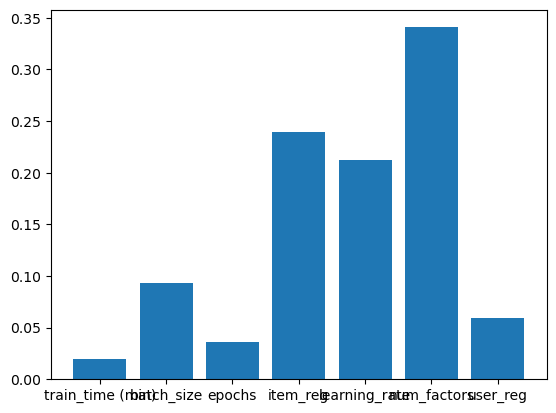

In [53]:
regr = RandomForestRegressor(max_depth=2)

result_df = save_results.results_df.copy()

numerical_cols = result_df.mean().notna()
numerical_cols = numerical_cols.index[numerical_cols]

numerical_df = result_df[numerical_cols]
numerical_df = (numerical_df - numerical_df.mean())/(numerical_df.std() +1e-6)

y_train = numerical_df["result"]
X_train = numerical_df.copy()
X_train = X_train.drop(columns=["result"])

regr.fit(X_train, y_train)

plt.bar(X_train.columns, regr.feature_importances_)
plt.show() 